## Project 3 - due Friday, 12/9 at 12pm
### Group members
* Qinhui Xu
* Ying Zhang
* Zezhi Zhou
* Zhian Wang

Work in groups of four people per project.
Select a dataset of at least 250,000 records, preferably at the level of individual transactions. Acquire the
data, survey it, wrangle it into a suitable format, and analyze it. Present your work in a brief (8-10 minute)
talk in class on Tuesday, 12/6, and write up your process and results in a reproducible notebook.
You may use any of the methods we studied in class: Unix command line tools, relational databases and
dimensional models with SQLite or PostgreSQL, or Spark. The datanotebook.org server will remain available
until the end of the semester and may be used for the project.
Attestation: All project team members should contribute meaningfully to the final results. Please attest to
your individual contributions and that each member contributed substantially to the project in your final
writeup.
Deadline: Friday, 12/9, 12pm. Submit your presentation (PDF export), your notebook, and any additionally
necessary files like scripts or images together in one zip file. Only one team member should submit on behalf
of all members. All team members should post their projects to GitHub for reviews after the deadline has
passed.


## Setup - select and obtain data

The US City Open Data Census has a variety of [transactional data from all over the country](http://us-city.census.okfn.org/).  Select one topic and one city from this Census, download the data, and explain your reason for this choice before proceeding.  Provide a link to the web page for the data set you've chosen.

I strongly encourage you to select a dataset from among the following topics:  Crime, Property Assessment, Campaign Finance Contributions, Service Requests (311), and Web Analytics.

By *transactional* data I mean records at the grain of one event per business process.  In the case of Service Requests (311), for example, that would require data at the level of each individual report of a service request.  If this isn't clear, think about the bike trip data - each individual ride was included - and look for data at that level of event/process specificity.  Avoid data like the Connecticut boating data, which was summarized by year, not individual transactions.

Please aim for a dataset of at least 10,000 individual records, but less than 250,000 records.  A little more or a little less is okay, but try to stay within these limits.

## Part 1 - Selection (30 points)
Identify and describe your dataset, its source, and what appeals to you about it. Acquire the data and
perform an initial exploration to determine which themes you wish to explore. Describe the questions you
want to be able to answer with the data, any concerns you have about the data, and any challenges you
expect to have to overcome.

** Download the Request Service data from website. https://data.austintexas.gov/api/views/i26j-ai4z/rows.csv?accessType=DOWNLOAD**

## The data is about the 311 Service Request in Austin. There are 388387 transactions in total.
#### We choose this data because we want to take a look at the quality of service in Austin. In addition, the dataset is neither to small nor too big, which we think we can handle.


In [1]:
!wget "https://data.austintexas.gov/api/views/i26j-ai4z/rows.csv?accessType=DOWNLOAD"

--2016-12-09 06:01:49--  https://data.austintexas.gov/api/views/i26j-ai4z/rows.csv?accessType=DOWNLOAD
Resolving data.austintexas.gov (data.austintexas.gov)... 52.206.140.205
Connecting to data.austintexas.gov (data.austintexas.gov)|52.206.140.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD’

rows.csv?accessType     [ <=>                  ] 126.52M  3.05MB/s   in 39s    

Last-modified header invalid -- time-stamp ignored.
2016-12-09 06:02:28 (3.25 MB/s) - ‘rows.csv?accessType=DOWNLOAD’ saved [132668417]



** Rename the csv file. **

In [2]:
!mv rows.csv?accessType=DOWNLOAD ServiceRequest.csv

** Explore the Data. **

In [3]:
!csvcut -n ServiceRequest.csv

  1: Service Request (SR) Number
  2: SR Type Code
  3: SR Description
  4: Owning Department
  5: Method Received
  6: SR Status
  7: Status Change Date
  8: Created Date
  9: Last Update Date
 10: Close Date
 11: SR Location
 12: Street Number
 13: Street Name
 14: City
 15: Zip Code
 16: County
 17: State Plane X Coordinate
 18: State Plane Y Coordinate
 19: Latitude Coordinate
 20: Longitude Coordinate
 21: (Latitude.Longitude)
 22: Council District
 23: Map Page
 24: Map Tile


** Let's have a look about the first 5 rows of the data to get an overview. **

In [4]:
!head -5 ServiceRequest.csv|csvcut -c1,2,3,4| csvlook
!head -5 ServiceRequest.csv|csvcut -c5,6,7,8| csvlook
!head -5 ServiceRequest.csv|csvcut -c9,10,11,12| csvlook
!head -5 ServiceRequest.csv|csvcut -c13,14,15,16| csvlook
!head -5 ServiceRequest.csv|csvcut -c17,18,19| csvlook
!head -5 ServiceRequest.csv|csvcut -c20,21,22| csvlook
!head -5 ServiceRequest.csv|csvcut -c23,24| csvlook

|------------------------------+--------------+------------------------------+--------------------|
|  Service Request (SR) Number | SR Type Code | SR Description               | Owning Department  |
|------------------------------+--------------+------------------------------+--------------------|
|  16-00107769                 | TRASIGMA     | Traffic Signal - Maintenance | Transportation     |
|  16-00108244                 | TRASIGMA     | Traffic Signal - Maintenance | Transportation     |
|  16-00108269                 | TRASIGMA     | Traffic Signal - Maintenance | Transportation     |
|  16-00108062                 | TRASIGMA     | Traffic Signal - Maintenance | Transportation     |
|------------------------------+--------------+------------------------------+--------------------|
|------------------+--------------------+------------------------+-------------------------|
|  Method Received | SR Status          | Status Change Date     | Created Date            |
|-------------

** Check if there is null value **

In [5]:
import pandas as pd
SRdf = pd.read_csv("ServiceRequest.csv")

/opt/conda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
SRdf.isnull().sum()

Service Request (SR) Number     4234
SR Type Code                    4235
SR Description                  4235
Owning Department               4235
Method Received                 4235
SR Status                       4235
Status Change Date              4235
Created Date                    4235
Last Update Date                4235
Close Date                     21760
SR Location                     7329
Street Number                  82031
Street Name                     7408
City                            7859
Zip Code                        7785
County                          9343
State Plane X Coordinate        7390
State Plane Y Coordinate        7433
Latitude Coordinate             7403
Longitude Coordinate            7403
(Latitude.Longitude)            7403
Council District               26041
Map Page                        7815
Map Tile                        8585
dtype: int64

In [7]:
dfNull= _

In [8]:
NullNum = pd.DataFrame(dfNull,columns=['Number'])
NullNum.reset_index(level=0,inplace=True)


/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


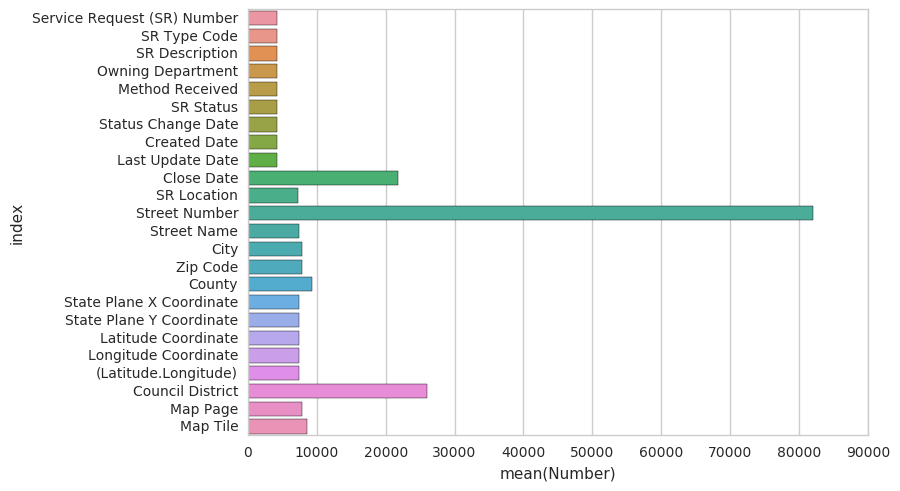

In [9]:
import seaborn as sns
sns.set_style("whitegrid")
ax = sns.barplot(x="Number", y="index", data=NullNum)

*** So, we can see that there are NULL values in all the columns. We will deal with NULL values in our next setp.***

Since the data is about Service Request, the first thing we want to know is:
    
   *  Which department received most Service Requests?

We will use Spart to deal with such a big amount of data and to answer this question.

** Chcek the basic statistic information about the file. **

In [2]:
!csvstat ServiceRequest.csv

We tried to use csvstat to explore the data, but it failed many times, so we used spark then.

** Use Spark to Explore Data **

In [5]:
from operator import add
RS = sc.textFile('ServiceRequest.csv')
RS.count()

In [1]:
from pyspark.sql.types import *
import pyspark.sql.functions as F

In [2]:
page_views_schema = StructType(
                    [StructField("SRID", StringType(), True),
                    StructField("SRTypeCode", StringType(), True),
                    StructField("SRdes", StringType(), True),
                    StructField("OwningDepart", StringType(), True),
                    StructField("MethodReceived", StringType(), True),
                    StructField("SRStatus", StringType(), True),
                    StructField("ChangeDate", StringType(), True),
                    StructField("CreateDate", StringType(), True),
                    StructField("LastUpdateDate", StringType(), True),
                    StructField("CloseDate", StringType(), True),
                    StructField("SRLoc", StringType(), True),
                    StructField("StreetNum", StringType(), True),
                    StructField("StreetName", StringType(), True),
                    StructField("City", StringType(), True),
                    StructField("ZipCode", StringType(), True),
                    StructField("County", StringType(), True),
                    StructField("StatePlaneX", StringType(), True),
                    StructField("StatePlaneY", StringType(), True),
                    StructField("Latitude", StringType(), True),
                    StructField("Longitude", StringType(), True),
                    StructField("Geocode", StringType(), True),
                    StructField("Council", StringType(), True),
                    StructField("MapPage", StringType(), True),
                    StructField("MapTitle", StringType(), True)]
                    )
#Data is read from Google Cloud Storage, a distributed filesystem like HDFS stored externally to the cluster
#If you wanna use your own HDFS, just prefix the file path with the absolute path 'hdfs:' or 
#with the relative path if HDFS is your cluster default filesystem
page_views_df = spark.read.schema(page_views_schema).options(header='true', inferschema='false', nullValue='\\N') \
                .csv("ServiceRequest.csv")

In [4]:
%time page_views_by_Status_pandas = page_views_df.groupBy('SRStatus').count().toPandas()

CPU times: user 661 ms, sys: 125 ms, total: 787 ms
Wall time: 4.88 s


In [10]:
page_views_by_Status_pandas = page_views_by_Status_pandas.set_index('count').sort_index(ascending=False)
page_views_by_Status_pandas.reset_index(level=0,inplace=True)
page_views_by_Status_pandas

,count,SRStatus
0,346574,Closed
1,12599,Duplicate (closed)
2,12388,Open
3,6975,Resolved
4,4235,None
5,3419,New
6,869,Work In Progress
7,504,Duplicate (open)
8,366,Transferred
9,238,Closed -Incomplete Information


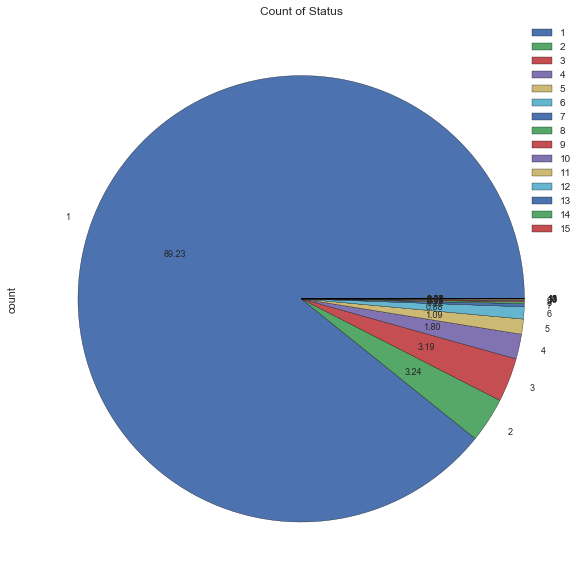

In [7]:
import seaborn as sns
%matplotlib inline
page_views_by_Status_pandas.plot.pie(y='count', figsize=(10, 10), labels=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15'], 
              title='Count of Status', autopct='%.2f', fontsize=9)

** From the pie chart, we can see that most of the request services are closed. So, in the next step analysis, we will focus on the closed service requests. **

In [8]:
%time page_views_by_owningDepart_pandas = page_views_df.groupBy('OwningDepart').count().toPandas()

CPU times: user 5.08 ms, sys: 2.05 ms, total: 7.14 ms
Wall time: 1.76 s


In [9]:
page_views_by_owningDepart_pandas = page_views_by_owningDepart_pandas.set_index('count').sort_index(ascending=False)
page_views_by_owningDepart_pandas.reset_index(level=0,inplace=True)
page_views_by_owningDepart_pandas

,count,OwningDepart
0,81497,Animal Services Office
1,67553,Transportation
2,66592,Austin Code Department
3,53938,Austin Resource Recovery
4,36809,Public Works
5,17075,Austin Energy Department
6,14799,Health & Human Services
7,14563,Parks & Recreation Department
8,11657,Austin Water Utility
9,11291,Economic Development Department


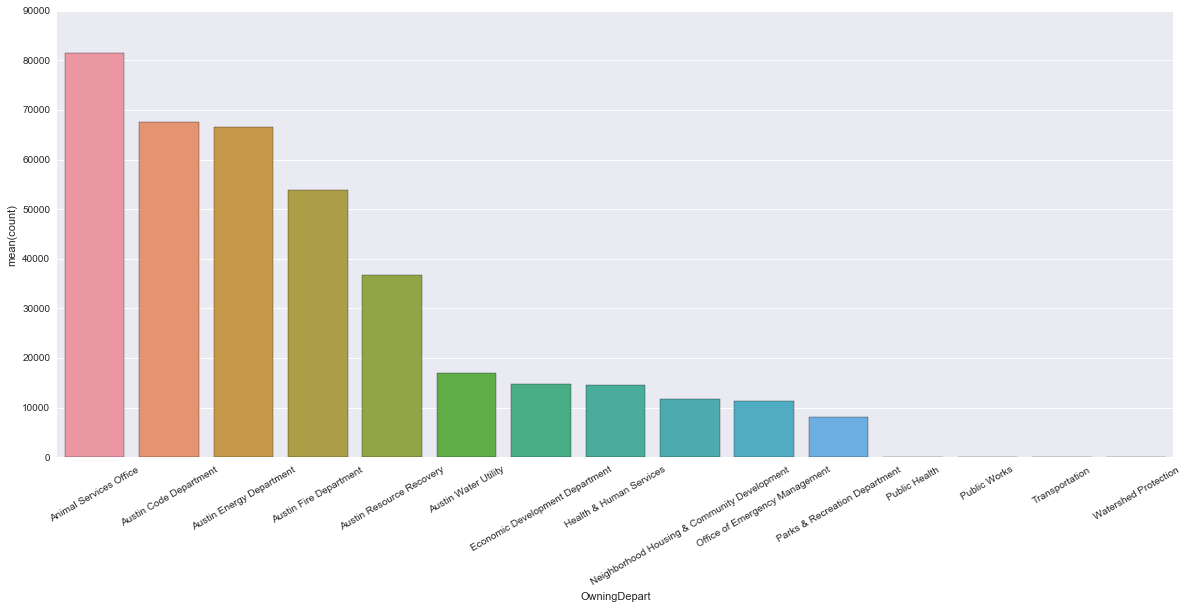

In [12]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rc
%matplotlib inline

rc('figure', figsize=(20, 8))
splt = sns.barplot(x='OwningDepart', y='count', data=page_views_by_owningDepart_pandas)
labels=['Animal Services Office', 'Austin Code Department', 'Austin Energy Department',\
        'Austin Fire Department','Austin Resource Recovery','Austin Water Utility','Economic Development Department',\
        'Health & Human Services','Neighborhood Housing & Community Development','Office of Emergency Management',\
        'Parks & Recreation Department','Public Health','Public Works','Transportation','Watershed Protection','NAN']
splt.set_xticklabels(labels, rotation=30)

From the histogram we can learn that Animal Services Office received most service requests. 

Also, we can see that Parks & Recreation Department, Public Health, Public Works, Transportation and Watershed Protection
received least service requests. 

**Now, a new question raised:**
* Why the result is different from our expectation that department like Transportation would receive more 
  service requests? What are the main causes of this result?

** Besides, we also want to explore what is the distribution of all these service requests in Austin and how long would a department react to the request?**


** To explore the distribution of all the service requests in Austin, we build a map to have an initial exploration of the data for the distribution issue. **

In [11]:
!pip install plotly

You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import plotly as py
#py.tools.set_credentials_file(username='zzyy2361669', api_key='U4js9YvyZajjXb1q1g4n')
py.tools.set_credentials_file(username='zy2361669', api_key='545WZGcM8fJlZvnZGCLs')
#py.tools.set_credentials_file(username='arfmomo2008bb', api_key="eByVC2q0IQW2SLCwiQJW")

import plotly.plotly as py
import plotly.tools as plotly_tools
from plotly.graph_objs import *
#py.sign_in("zzyy2361669", "U4js9YvyZajjXb1q1g4n")
py.sign_in("zy2361669", "545WZGcM8fJlZvnZGCLs")
#py.sign_in('arfmomo2008bb', "eByVC2q0IQW2SLCwiQJW")
import pandas as pd

In [3]:
Dep_List = ["Animal Services Office","Transportation", "Austin Code Department", "Austin Resource Recovery",\
           "Public Works", "Austin Energy Department","Health & Human Services","Parks & Recreation Department",\
           "Austin Water Utility","Economic Development Department","Watershed Protection",\
            "Neighborhood Housing & Community Development","Austin Fire Department","Office of Emergency Management"]
Color_List = ["#FF8C69","#FFE4E1","#FFEC8B","#D1EEEE","#AEEEEE","#B4EEB4","#5CACEE","#8470FF","#43CD80","#CD8500",\
             "#FF4500","#FFC1C1","#B3B3B3","#8FBC8F"]

df = pd.read_csv('ServiceRequest.csv')
df = df.sample(frac=0.005 )   # randomly select 2000 rows in dataframe

df['text'] = df['SR Type Code'] + '<br>' + df['SR Description'] + '<br>' + df['Owning Department']

#mapbox_access_token = 'pk.eyJ1IjoiY2hlbHNlYXBsb3RseSIsImEiOiJjaXFqeXVzdDkwMHFrZnRtOGtlMGtwcGs4In0.SLidkdBMEap9POJGIe1eGw'
mapbox_access_token = "pk.eyJ1IjoienkyMzYxNjY5IiwiYSI6ImNpdzhtb3NreTAyZ3Eyem1oNGFoaGNzcjUifQ.0KdVns1zQyjGXUvn2Ab_jw"

dat = []
for i in range(len(Dep_List)):
    df_sub = df[(df["Owning Department"]==Dep_List[i])]  
    x = df_sub['Latitude Coordinate'].tolist()
    y = df_sub['Longitude Coordinate'].tolist()
    
    d = Scattermapbox(
            lat=x,
            lon=y,
            mode='markers',
            marker=Marker(
                size=6, color=Color_List[i] 
            ),
        text = [n for n in df_sub['text']],
        name = Dep_List[i])
    dat.append(d)
    
data = Data(dat)      

layout = Layout(
    autosize=True,
    width=950,
    height=600,
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=30.3,
            lon=-97.8
        ),
        pitch=0,
        zoom=10
    ),
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Service Requests', validate=False)

/opt/conda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning:

Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.



In [4]:
# you need to run all the above code to show the map, or you can see the screenshot below. 
# You need to upload all the files in the project folder to see the screenshot
from IPython.display import Image
Image(url = "https://github.com/YingZhang1028/istm-6212/raw/master/project03/Graph/Map_1.png", width=800, height=800)

From the map, we can see that some of the requests are concentrated while requests for Animal Service Office are scattered.

#### *Using the map, we can have a direct exploration of all the data. Each point can show its department and service request description.*

### Which columns interest you the most?

From the initial data exploration, the columns interest us most are SRdescription, Owning Department, Create Date, Close Date and Geocode

** To explore the distribution, location, owningDepartment, status, respond time of the service requests, we will create fact table and dimension tables so that we can explore the problem in different aspects. **

** -----End of Data Exploration------ **

## Part 2 - Wrangling (35 points)


Based on what you found above, wrangle the data into a format suitable for analysis. This may involve
cleaning, filtering, merging, and modeling steps, any and all of which are valid for this project. Describe your
process as you proceed, and document any scripts, databases, or other models you develop. Be specific about
any key decisions to modify or remove data, how you overcame any challenges, and all assumptions you make
about the meaning of variables and their values.
Verify that your wrangling steps have succeeded (for example, if you loaded the data into a dimensional
model, ensure that the fact table contains the right number of records).

** Below is the link to our Star Schema diagram.**

https://www.processon.com/diagraming/5845c9c1e4b0d0d77c0d1cbf


In [5]:
from IPython.display import Image
Image(url = "https://raw.githubusercontent.com/Qinhui-Xu/istm-6212/master/Project03/starschema.png", width=800, height=800)

** Create and connect to database. **

In [2]:
%load_ext sql

/opt/conda/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/opt/conda/lib/python3.5/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [3]:
!echo 'redspot' | sudo -S service postgresql restart

[sudo] password for jovyan: Restarting PostgreSQL 9.5 database server: main.


The following cells create the database 'ServiceRequest' and make a connection to it.

In [4]:
!createdb -U dbuser ServiceRequest

createdb: database creation failed: ERROR:  database "ServiceRequest" already exists


In [5]:
%sql postgresql://dbuser@localhost/ServiceRequest

'Connected: dbuser@ServiceRequest'

** Create table. **

In [6]:
%%sql
DROP TABLE IF EXISTS  ServiceRequest;
CREATE TABLE  ServiceRequest
(
    SRID VARCHAR(16),
    SRTypeCode VARCHAR(16),
    SRdes VARCHAR(60),
    OwningDepart VARCHAR(60),
    MethodReceived VARCHAR(25),
    SRStatus VARCHAR(35),
    ChangeDate TIMESTAMP,
    CreateDate TIMESTAMP,
    LastUpdateDate TIMESTAMP,
    CloseDate TIMESTAMP,
    SRLoc VARCHAR(160),
    StreetNum VARCHAR(8),
    StreetName VARCHAR(100),
    City VARCHAR(18),
    ZipCode VARCHAR(8),
    County VARCHAR(16),
    StatePlaneX CHAR(40),
    StatePlaneY VARCHAR(40),
    Latitude VARCHAR(40),
    Longitude VARCHAR(40),
    Geocode VARCHAR(60),
    Council VARCHAR(8),
    MapPage VARCHAR(8),
    MapTitle VARCHAR(8)
)

Done.
Done.


[]

** Load the data. **

In [7]:
!pwd

/home/jovyan/work


In [8]:
%%sql
COPY ServiceRequest FROM '/home/jovyan/work/ServiceRequest.csv'
CSV
HEADER
QUOTE '"'
DELIMITER ',';

390053 rows affected.


[]

** Verify the loaded records. **

Below cell shows that the records number loaded to database is correct.

In [9]:
%%sql
SELECT COUNT(*) FROM ServiceRequest;

1 rows affected.


count
390053


** Deal with null value **

In [10]:
%%sql
DELETE FROM ServiceRequest WHERE SRID IS NULL;

4234 rows affected.


[]

In [11]:
%%sql
DROP TABLE IF EXISTS SR;
CREATE TABLE SR as (
SELECT
    SRID
    ,SRTypeCode
    , coalesce(SRdes,'n/a') as SRdes
    , coalesce(OwningDepart, 'n/a') as OwningDepart
    , coalesce(MethodReceived, 'n/a') as MethodReceived
    , coalesce(SRStatus, 'n/a') as SRStatus
    , coalesce(ChangeDate, '01/01/1900  00:00:00 AM') as ChangeDate
    , coalesce(CreateDate, '01/01/1900  00:00:00 AM') as CreateDate
    , coalesce(LastUpdateDate, '01/01/1900  00:00:00 AM') as LastUpdateDate
    , coalesce(CloseDate, '01/01/1900  00:00:00 AM') as CloseDate
    , coalesce(SRLoc, 'n/a') as SRLoc
    , coalesce(StreetNum, 'n/a') as StreetNum
    , coalesce(StreetName, 'n/a') as StreetName
    , coalesce(City, 'n/a') as City
    , coalesce(ZipCode, 'n/a') as ZipCode
    , coalesce(County, 'n/a') as County
    , coalesce(StatePlaneX, 'n/a') as StatePlaneX
    , coalesce(StatePlaneY, 'n/a') as StatePlaneY
    , coalesce(Latitude, '0') as Latitude
    , coalesce(Longitude, '0') as Longitude
    , coalesce(Geocode, '(0,0)') as Geocode
    , coalesce(Council, 'n/a') as Council
    , coalesce(MapPage, 'n/a') as MapPage
    , coalesce(MapTitle, 'n/a') as MapTitle
FROM ServiceRequest
);


Done.
385819 rows affected.


[]

Now, let's see the first 5 rows in the database.

In [12]:
%%sql
SELECT * FROM SR
LIMIT 5;

5 rows affected.


srid,srtypecode,srdes,owningdepart,methodreceived,srstatus,changedate,createdate,lastupdatedate,closedate,srloc,streetnum,streetname,city,zipcode,county,stateplanex,stateplaney,latitude,longitude,geocode,council,mappage,maptitle
16-00107769,TRASIGMA,Traffic Signal - Maintenance,Transportation,Phone,Duplicate (closed),2016-05-06 12:11:57,2016-05-06 12:01:46,2016-05-06 12:11:57,2016-05-06 12:11:57,"WINDSOR RD & EXPOSITION BLVD, AUSTIN, TX 78703",n/a,WINDSOR RD & EXPOSITION BLVD,AUSTIN,78703,TRAVIS,3106038.49745799,10080978.0030157,30.29669887,-97.76826374,"(30.29669887, -97.76826374)",10,584C,MH24
16-00108244,TRASIGMA,Traffic Signal - Maintenance,Transportation,Phone,Duplicate (closed),2016-05-06 19:51:27,2016-05-06 19:51:27,2016-05-06 19:51:27,2016-05-06 19:51:27,"6001 MANCHACA RD, AUSTIN, TX 78745",6001,MANCHACA,AUSTIN,78745,TRAVIS,3096240.5,10050194,30.2126949,-97.8015215,"(30.2126949, -97.8015215)",5,643M,MF17
16-00108269,TRASIGMA,Traffic Signal - Maintenance,Transportation,Phone,Duplicate (closed),2016-05-06 20:22:56,2016-05-06 20:22:56,2016-05-06 20:22:56,2016-05-06 20:22:56,"6001 MANCHACA RD, AUSTIN, TX 78745",6001,MANCHACA,AUSTIN,78745,TRAVIS,3096240.5,10050194,30.2126949,-97.8015215,"(30.2126949, -97.8015215)",5,643M,MF17
16-00108062,TRASIGMA,Traffic Signal - Maintenance,Transportation,Phone,Duplicate (closed),2016-05-10 16:56:52,2016-05-06 17:03:45,2016-05-10 16:56:52,2016-05-10 16:56:52,"8401 N CAPITAL OF TEXAS HWY NB, AUSTIN, TX 78759",8401,CAPITAL OF TEXAS,AUSTIN,78759,TRAVIS,3105863.35797435,10113092.5341337,30.38498865,-97.76647071,"(30.38498865, -97.76647071)",10,494L,MH32
16-00107654,STREETL2,Street Light Issue- Address,Austin Energy Department,Phone,Closed,2016-05-10 06:58:01,2016-05-06 10:28:16,2016-05-10 06:58:01,2016-05-10 06:58:01,"300 WEST AVE, AUSTIN, TX 78703",300,WEST,AUSTIN,78703,TRAVIS,3111493.73999999,10070696.54,30.26808964,-97.75173887,"(30.26808964, -97.75173887)",9,584V,MH22


In [13]:
%%sql
ALTER TABLE SR
ADD COLUMN CreateCase_date CHAR(10),
ADD COLUMN CreateCase_year INTEGER,
ADD COLUMN CreateCase_quarter INTEGER,
ADD COLUMN CreateCase_month INTEGER,
ADD COLUMN CreateCase_day INTEGER,
ADD COLUMN CreateCase_hour INTEGER,
ADD COLUMN Create_day_of_week_str CHAR(9),
ADD COLUMN CloseCase_date CHAR(10),
ADD COLUMN CloseCase_year INTEGER,
ADD COLUMN CloseCase_quarter INTEGER,
ADD COLUMN CloseCase_month INTEGER,
ADD COLUMN CloseCase_day INTEGER,
ADD COLUMN CloseCase_hour INTEGER,
ADD COLUMN Close_day_of_week_str CHAR(9)
;

Done.


[]

In [14]:
%%sql
UPDATE SR SET (CreateCase_date, CreateCase_year, CreateCase_quarter, CreateCase_month, CreateCase_day, CreateCase_hour,Create_day_of_week_str) = 
(   
    TO_CHAR(CreateDate, 'YYYY-MM-DD'), 
    CAST(TO_CHAR(CreateDate, 'YYYY') AS INTEGER),
    CAST(TO_CHAR(CreateDate, 'Q') AS INTEGER),
    CAST(TO_CHAR(CreateDate, 'MM') AS INTEGER),
    CAST(TO_CHAR(CreateDate, 'DD') AS INTEGER),
    CAST(TO_CHAR(CreateDate, 'HH24') AS INTEGER),
    TO_CHAR(CreateDate, 'Day')
 )
;

385819 rows affected.


[]

In [15]:
%%sql
UPDATE SR SET (CloseCase_date, CloseCase_year, CloseCase_quarter, CloseCase_month, CloseCase_day, CloseCase_hour,Close_day_of_week_str) = 
(   
    TO_CHAR(CloseDate, 'YYYY-MM-DD'), 
    CAST(TO_CHAR(CloseDate, 'YYYY') AS INTEGER),
    CAST(TO_CHAR(CloseDate, 'Q') AS INTEGER),
    CAST(TO_CHAR(CloseDate, 'MM') AS INTEGER),
    CAST(TO_CHAR(CloseDate, 'DD') AS INTEGER),
    CAST(TO_CHAR(CloseDate, 'HH24') AS INTEGER),
    TO_CHAR(CloseDate, 'Day')
 )
;

385819 rows affected.


[]

In [16]:
%%sql
SELECT
CreateDate
CreateCase_date,
CreateCase_year,
CreateCase_quarter,
CreateCase_month,
CreateCase_day,
CreateCase_hour,
Create_day_of_week_str,
CloseDate,
CloseCase_date,
CloseCase_year,
CloseCase_quarter,
CloseCase_month,
CloseCase_day,
CloseCase_hour,
Close_day_of_week_str

FROM SR
LIMIT 5
;

5 rows affected.


createcase_date,createcase_year,createcase_quarter,createcase_month,createcase_day,createcase_hour,create_day_of_week_str,closedate,closecase_date,closecase_year,closecase_quarter,closecase_month,closecase_day,closecase_hour,close_day_of_week_str
2016-04-29 22:20:59,2016,2,4,29,22,Friday,2016-05-11 16:29:24,2016-05-11,2016,2,5,11,16,Wednesday
2016-05-07 17:15:00,2016,2,5,7,17,Saturday,1900-01-01 00:00:00,1900-01-01,1900,1,1,1,0,Monday
2016-05-07 08:03:35,2016,2,5,7,8,Saturday,2016-11-08 01:09:33,2016-11-08,2016,4,11,8,1,Tuesday
2016-05-07 17:29:00,2016,2,5,7,17,Saturday,1900-01-01 00:00:00,1900-01-01,1900,1,1,1,0,Monday
2016-05-08 08:18:28,2016,2,5,8,8,Sunday,2016-05-09 07:05:24,2016-05-09,2016,2,5,9,7,Monday


** We need to calculate the time used to close the case. **

In [17]:
%%sql
ALTER TABLE SR
ADD COLUMN RespondTime FLOAT(2);

Done.


[]

In [18]:
%%sql
UPDATE SR SET (RespondTime) = 
(   
    CASE WHEN closecase_date = '1900-01-01' THEN
        EXTRACT (epoch From (SELECT (NOW() - CreateDate))/86400)
    ELSE
        EXTRACT (epoch From (SELECT (CloseDate - CreateDate))/86400)
    END
    );

385819 rows affected.


[]

In [19]:
%%sql
SELECT srid, CloseDate, CreateDate, RespondTime
FROM SR
WHERE RespondTime < 0
Limit 10;

1 rows affected.


srid,closedate,createdate,respondtime
15-00158927,2015-07-10 00:00:00,2015-07-10 10:11:33,-0.424688


We can see that there is something wrong with this transcation.

In [20]:
%%sql
SELECT * FROM SR
LIMIT 5;

5 rows affected.


srid,srtypecode,srdes,owningdepart,methodreceived,srstatus,changedate,createdate,lastupdatedate,closedate,srloc,streetnum,streetname,city,zipcode,county,stateplanex,stateplaney,latitude,longitude,geocode,council,mappage,maptitle,createcase_date,createcase_year,createcase_quarter,createcase_month,createcase_day,createcase_hour,create_day_of_week_str,closecase_date,closecase_year,closecase_quarter,closecase_month,closecase_day,closecase_hour,close_day_of_week_str,respondtime
16-00108900,ACLONAG,Loose Dog,Animal Services Office,Phone,Open,2016-05-07 17:29:00,2016-05-07 17:29:00,2016-05-07 17:29:00,1900-01-01 00:00:00,"5201 ROSS RD, DEL VALLE, TX 78617",5201,ROSS,DEL VALLE,78617,TRAVIS,3155647.273,10039416.66,30.17921533,-97.61433866,"(30.17921533, -97.61433866)",n/a,678F,MQ15,2016-05-07,2016,2,5,7,17,Saturday,1900-01-01,1900,1,1,1,0,Monday,215.531
16-00109265,PARMACIS,Parking Machine Issue,Transportation,Phone,Closed,2016-05-09 07:05:24,2016-05-08 08:18:28,2016-05-09 07:05:25,2016-05-09 07:05:24,n/a,n/a,n/a,n/a,n/a,n/a,n/a,n/a,0,0,"(0,0)",n/a,n/a,n/a,2016-05-08,2016,2,5,8,8,Sunday,2016-05-09,2016,2,5,9,7,Monday,0.949259
16-00107183,PARMACIS,Parking Machine Issue,Transportation,Phone,Closed,2016-05-09 06:52:27,2016-05-05 19:51:54,2016-05-09 06:52:28,2016-05-09 06:52:27,n/a,n/a,n/a,n/a,n/a,n/a,n/a,n/a,0,0,"(0,0)",n/a,n/a,n/a,2016-05-05,2016,2,5,5,19,Thursday,2016-05-09,2016,2,5,9,6,Monday,3.45871
16-00269465,CODECOMP,Austin Code - Request Code Officer,Austin Code Department,Phone,Closed,2016-10-11 07:54:19,2016-10-11 07:44:52,2016-10-11 15:00:39,2016-10-11 07:54:19,n/a,n/a,n/a,n/a,n/a,n/a,n/a,n/a,0,0,"(0,0)",n/a,n/a,n/a,2016-10-11,2016,4,10,11,7,Tuesday,2016-10-11,2016,4,10,11,7,Tuesday,0.006562
16-00112998,PARMACIS,Parking Machine Issue,Transportation,Phone,Closed,2016-05-12 06:45:47,2016-05-11 18:50:13,2016-05-12 06:45:48,2016-05-12 06:45:47,n/a,n/a,n/a,n/a,n/a,n/a,n/a,n/a,0,0,"(0,0)",n/a,n/a,n/a,2016-05-11,2016,2,5,11,18,Wednesday,2016-05-12,2016,2,5,12,6,Thursday,0.496921


#### Check the one to one relationship

Using the below code to find whether SR Type code and SR Description have a 1-to-1 relationship.
* Function checkdependency check if two columns are dependent (bijection)

In [21]:
%%sql
CREATE OR REPLACE FUNCTION checkdependency(text,text) RETURNS text AS $$
DECLARE
    result text; 
    c1 text;
    c2 text;
    r1 boolean;
    r2 boolean;
BEGIN
    c1 := $1;
    c2 := $2;
    EXECUTE 'SELECT count(*)=0 FROM ( SELECT '|| c1 ||' FROM ( SELECT distinct('|| c1 ||'),'||c2||' FROM SR )t1 GROUP BY '|| c1 ||' HAVING count(*)>1)t2'
        INTO r1;
    EXECUTE 'SELECT count(*)=0 FROM ( SELECT '|| c2 ||' FROM ( SELECT distinct('|| c2 ||'),'||c1||' FROM SR )t1 GROUP BY '|| c2 ||' HAVING count(*)>1)t2'
        INTO r2;
    SELECT r1 AND r2 INTO result;
    RETURN result;
END
$$ LANGUAGE plpgsql;

Done.


[]

In [22]:
%%sql 
SELECT checkdependency('SRTypeCode','SRdes');

1 rows affected.


checkdependency
false


#### Create the Service Request Type Dimension table

In [23]:
%%sql
DROP TABLE IF EXISTS SRType;
CREATE TABLE SRType
(
    SRType_key serial,
    SRType_Code VARCHAR(16),
    SRType_Des VARCHAR(60),
    PRIMARY KEY (SRType_key)
)

Done.
Done.


[]

In [24]:
%%sql
INSERT INTO SRType (SRType_Code, SRType_Des)
SELECT DISTINCT SRTypeCode, SRdes
FROM SR;

135 rows affected.


[]

In [25]:
%%sql
SELECT *
FROM SRType
LIMIT 10;

10 rows affected.


srtype_key,srtype_code,srtype_des
1,ACBITE2,Animal Bite
2,ACCOYTE,Coyote Complaints
3,ACCOYTE,zCoyote Complaints
4,ACDEADBI,Dead Bird
5,ACFOUND,Found Animal - Pick Up
6,ACINFORM,Animal Control - Assistance Request
7,ACLOANIM,Loose Animal (not dog)
8,ACLOANIM,Loose Animal Not Dog
9,ACLONAG,Loose Dog
10,ACPROPER,Animal - Proper Care


#### Create the Department Dimension table

In [26]:
%%sql
DROP TABLE IF EXISTS Department;
CREATE TABLE Department
(
    Dept_key serial,
    Department_Name VARCHAR(60),
    PRIMARY KEY (Dept_key)
)

Done.
Done.


[]

In [27]:
%%sql
INSERT INTO Department (Department_Name)
SELECT DISTINCT owningdepart
FROM SR;

16 rows affected.


[]

In [28]:
%%sql
SELECT *
FROM Department
LIMIT 5;

5 rows affected.


dept_key,department_name
1,Public Health
2,Animal Services Office
3,Economic Development Department
4,n/a
5,Austin Water Utility


#### Create the Method Dimension table

In [29]:
%%sql
DROP TABLE IF EXISTS Method;
CREATE TABLE Method
(
    Method_key serial,
    Method_Received VARCHAR(25),
    PRIMARY KEY (Method_key)
)

Done.
Done.


[]

In [30]:
%%sql
INSERT INTO Method (Method_Received)
SELECT DISTINCT MethodReceived
FROM SR;

19 rows affected.


[]

In [31]:
%%sql
SELECT *
FROM Method
LIMIT 5;

5 rows affected.


method_key,method_received
1,Mobile Devi
2,Mass Entry
3,CSR - Follow On SR
4,n/a
5,Web


#### Create the Status Dimension table

In [32]:
%%sql
DROP TABLE IF EXISTS Status;
CREATE TABLE Status
(
    Status_key serial,
    SR_Status VARCHAR(35),
    PRIMARY KEY (Status_key)
)

Done.
Done.


[]

In [33]:
%%sql
INSERT INTO Status (SR_Status)
SELECT DISTINCT SRStatus
FROM SR;

15 rows affected.


[]

In [34]:
%%sql
SELECT *
FROM Status
LIMIT 5;

5 rows affected.


status_key,sr_status
1,Closed -Incomplete Information
2,Work In Progress
3,n/a
4,Open
5,Resolved


#### Create the Location Dimension table

In [35]:
%%sql
DROP TABLE IF EXISTS Location;
CREATE TABLE Location
(
    Location_key serial,
    SR_Location VARCHAR(160),
    Street_Name VARCHAR(100),
    City VARCHAR(18),
    ZipCode VARCHAR(8),
    County VARCHAR(16),
    Latitude VARCHAR(40),
    Longitude VARCHAR(40),
    District VARCHAR(8),
    PRIMARY KEY (Location_key)
)

Done.
Done.


[]

In [36]:
%%sql
INSERT INTO Location (SR_Location,Street_Name,City,ZipCode,County,Latitude,Longitude,District)
SELECT DISTINCT 
    SRLoc,
    StreetName,
    City,
    ZipCode,
    County,
    Latitude,
    Longitude,
    Council
FROM SR;

194241 rows affected.


[]

In [37]:
%%sql
SELECT *
FROM Location
LIMIT 10;

10 rows affected.


location_key,sr_location,street_name,city,zipcode,county,latitude,longitude,district
1,*METER TX,*Meter,n/a,n/a,n/a,0,0,n/a
2,"0 BASTROP HWY NB, AUSTIN, TX",BASTROP HWY,AUSTIN,78725,TRAVIS,30.24562909,-97.69029776,3
3,"0 E US 290 HWY EB, AUSTIN, TX",290,AUSTIN,78724,TRAVIS,30.32544739,-97.67157404,1
4,"0 MANOR TO ED BLUESTEIN NB RAMP, AUSTIN, TX 78724",MANOR TO ED BLUESTEIN NB,AUSTIN,78724,TRAVIS,30.31712713,-97.66271067,n/a
5,"0 N SH 130 NB, AUSTIN, TX",130,AUSTIN,78653,TRAVIS,30.30933259,-97.57004581,1
6,"0 RESEARCH BLVD SVRD NB, AUSTIN, TX 78758",RESEARCH BLVD SVRD,AUSTIN,78758,TRAVIS,30.37313223,-97.72566097,7
7,"0 SERVICE RD N/A N/A N/A, AUSTIN, TX 78758",SERVICE,AUSTIN,78719,TRAVIS,30.20670769,-97.67299638,2
8,"0 TRAIL DRIVER, DRIPPING SPRINGS, TX 78736",TRAIL DRIVER,DRIPPING SPRINGS,78737,HAYS,30.23233167,-98.00503823,n/a
9,0328 TX,n/a,n/a,n/a,n/a,0,0,n/a
10,"1 APPLEGREEN CT, THE HILLS, TX 78738",APPLEGREEN,THE HILLS,78738,TRAVIS,30.34294091,-97.9936555,n/a


#### Create the 'Create Case Time' Dimension table

In [38]:
%%sql
DROP TABLE IF EXISTS CreateCaseTime;
CREATE TABLE CreateCaseTime (
    Create_Date_Key SERIAL,
    CreateCase_date CHAR(10),
    CreateCase_year INTEGER,
    CreateCase_quarter INTEGER,
    CreateCase_month INTEGER,
    CreateCase_day INTEGER,
    CreateCase_hour INTEGER,
    Create_day_of_week_str CHAR(9),
    PRIMARY KEY (Create_Date_Key)
);

Done.
Done.


[]

In [39]:
%%sql
INSERT INTO CreateCaseTime (CreateCase_date,CreateCase_year,CreateCase_quarter,CreateCase_month,CreateCase_day,CreateCase_hour,Create_day_of_week_str)
SELECT DISTINCT
CreateCase_date,
CreateCase_year,
CreateCase_quarter,
CreateCase_month,
CreateCase_day,
CreateCase_hour,
Create_day_of_week_str
    
FROM SR;

23297 rows affected.


[]

In [40]:
%%sql
SELECT *
FROM CreateCaseTime
LIMIT 10;

10 rows affected.


create_date_key,createcase_date,createcase_year,createcase_quarter,createcase_month,createcase_day,createcase_hour,create_day_of_week_str
1,1900-01-01,1900,1,1,1,0,Monday
2,2013-12-31,2013,4,12,31,0,Tuesday
3,2014-01-01,2014,1,1,1,1,Wednesday
4,2014-01-01,2014,1,1,1,3,Wednesday
5,2014-01-01,2014,1,1,1,4,Wednesday
6,2014-01-01,2014,1,1,1,7,Wednesday
7,2014-01-01,2014,1,1,1,8,Wednesday
8,2014-01-01,2014,1,1,1,9,Wednesday
9,2014-01-01,2014,1,1,1,10,Wednesday
10,2014-01-01,2014,1,1,1,11,Wednesday


#### Create the 'Close Case Time' Dimension table

In [41]:
%%sql
DROP TABLE IF EXISTS CloseCaseTime;
CREATE TABLE CloseCaseTime (
    Close_Date_Key SERIAL,
    CloseCase_date CHAR(10),
    CloseCase_year INTEGER,
    CloseCase_quarter INTEGER,
    CloseCase_month INTEGER,
    CloseCase_day INTEGER,
    CloseCase_hour INTEGER,
    Close_day_of_week_str CHAR(9),
    PRIMARY KEY (Close_Date_Key)
);

Done.
Done.


[]

In [42]:
%%sql
INSERT INTO CloseCaseTime (CloseCase_date,CloseCase_year,CloseCase_quarter,CloseCase_month,CloseCase_day,CloseCase_hour,Close_day_of_week_str)
SELECT DISTINCT
CloseCase_date,
CloseCase_year,
CloseCase_quarter,
CloseCase_month,
CloseCase_day,
CloseCase_hour,
Close_day_of_week_str
    
FROM SR;

20463 rows affected.


[]

In [43]:
%%sql
SELECT *
FROM CloseCaseTime
LIMIT 10;

10 rows affected.


close_date_key,closecase_date,closecase_year,closecase_quarter,closecase_month,closecase_day,closecase_hour,close_day_of_week_str
1,1900-01-01,1900,1,1,1,0,Monday
2,2013-12-31,2013,4,12,31,0,Tuesday
3,2014-01-01,2014,1,1,1,12,Wednesday
4,2014-01-02,2014,1,1,2,0,Thursday
5,2014-01-02,2014,1,1,2,8,Thursday
6,2014-01-03,2014,1,1,3,0,Friday
7,2014-01-03,2014,1,1,3,1,Friday
8,2014-01-03,2014,1,1,3,5,Friday
9,2014-01-03,2014,1,1,3,6,Friday
10,2014-01-03,2014,1,1,3,7,Friday


#### Build the Fact Table

In [44]:
%%sql
DROP TABLE IF EXISTS Fact;
CREATE TABLE Fact
(
    SRID VARCHAR(16) not null,
    SRType_key integer,
    Dept_key integer,
    Method_key integer,
    Status_key integer,
    Location_key integer,
    Create_Date_key integer,
    Close_Date_key integer,
    Respond_Time float(2)

)

Done.
Done.


[]

In [45]:
%%sql
select *
from Fact
limit 10

0 rows affected.


srid,srtype_key,dept_key,method_key,status_key,location_key,create_date_key,close_date_key,respond_time


In [46]:
%%sql
INSERT INTO Fact (SRID, Respond_Time)
SELECT SRID,RespondTime
FROM SR;

385819 rows affected.


[]

In [48]:
%%sql
select *
from Fact
limit 10;

10 rows affected.


srid,srtype_key,dept_key,method_key,status_key,location_key,create_date_key,close_date_key,respond_time
16-00269465,None,None,None,None,None,None,None,0.006562
16-00112998,None,None,None,None,None,None,None,0.496921
16-00204094,None,None,None,None,None,None,None,0.892153
16-00116970,None,None,None,None,None,None,None,3.90609
16-00116784,None,None,None,None,None,None,None,1.93319
16-00256920,None,None,None,None,None,None,None,0.650625
16-00121677,None,None,None,None,None,None,None,2.75412
16-00125197,None,None,None,None,None,None,None,1.91779
16-00125676,None,None,None,None,None,None,None,6.69648
16-00121186,None,None,None,None,None,None,None,6.437


** Insert SRType_key from SRType. **

In [49]:
%%sql
UPDATE 
  Fact T1 
SET
  SRType_key = T2.SRType_key
FROM SRType T2
  INNER JOIN SR T3 ON T2.SRType_Code = T3.SRTypeCode AND T2.SRType_Des = T3.SRdes
WHERE 
  T1.SRID = T3.SRID
;

385818 rows affected.


[]

In [50]:
%%sql
select *
from Fact
limit 10;

10 rows affected.


srid,srtype_key,dept_key,method_key,status_key,location_key,create_date_key,close_date_key,respond_time
16-,None,None,None,None,None,None,None,42711.3
14-00000197,23,None,None,None,None,None,None,3.43958
14-00000230,132,None,None,None,None,None,None,2.19306
14-00000261,111,None,None,None,None,None,None,2.10556
14-00000268,2,None,None,None,None,None,None,4.11736
14-00000294,125,None,None,None,None,None,None,203.253
14-00000296,111,None,None,None,None,None,None,5.03403
14-00000304,6,None,None,None,None,None,None,38.3742
14-00000311,9,None,None,None,None,None,None,8.25694
14-00000312,119,None,None,None,None,None,None,0.995139


** Insert Dept_key from Department. **

In [51]:
%%sql
UPDATE 
  Fact T1 
SET
  Dept_key = T2.Dept_key
FROM Department T2
  INNER JOIN SR T3 ON T2.Department_Name = T3.OwningDepart
WHERE 
  T1.SRID = T3.SRID
;

385819 rows affected.


[]

In [52]:
%%sql
select *
from Fact
limit 10;

10 rows affected.


srid,srtype_key,dept_key,method_key,status_key,location_key,create_date_key,close_date_key,respond_time
16-00161026,28,11,None,None,None,None,None,2.82891
16-00161027,9,2,None,None,None,None,None,0.804398
16-00161029,28,11,None,None,None,None,None,2.82901
16-00161032,112,15,None,None,None,None,None,0.701192
16-00161035,28,11,None,None,None,None,None,2.82738
16-00161036,16,10,None,None,None,None,None,0.956944
16-00161037,114,8,None,None,None,None,None,0.711933
16-00161038,6,2,None,None,None,None,None,0.770069
16-00161039,92,16,None,None,None,None,None,1.20544
16-00161040,24,2,None,None,None,None,None,0.088275


** Insert Method_key from Method. **

In [53]:
%%sql
UPDATE 
  Fact T1 
SET
  Method_key = T2.Method_key
FROM Method T2
  INNER JOIN SR T3 ON T2.Method_Received = T3.MethodReceived
WHERE 
  T1.SRID = T3.SRID
;

385819 rows affected.


[]

In [54]:
%%sql
select *
from Fact
limit 10;

10 rows affected.


srid,srtype_key,dept_key,method_key,status_key,location_key,create_date_key,close_date_key,respond_time
14-00000702,18,5,17,None,None,None,None,6.18542
14-00000563,1,2,17,None,None,None,None,1.88611
14-00000602,115,8,17,None,None,None,None,1.49167
14-00000629,125,15,17,None,None,None,None,41.0235
14-00000667,87,15,17,None,None,None,None,270.157
14-00000372,9,2,17,None,None,None,None,0.0
14-00000197,23,2,17,None,None,None,None,3.43958
14-00000700,115,8,17,None,None,None,None,1.07153
14-00000714,93,16,17,None,None,None,None,1.04167
14-00000637,118,10,17,None,None,None,None,1.45069


** Insert Status_key from Status. **

In [55]:
%%sql
UPDATE 
  Fact T1 
SET
  Status_key = T2.Status_key
FROM Status T2
  INNER JOIN SR T3 ON T2.SR_Status = T3.SRStatus
WHERE 
  T1.SRID = T3.SRID
;

385819 rows affected.


[]

** Insert Location_key from Location. **

In [56]:
%%sql
UPDATE 
  Fact T1 
SET
  Location_key = T2.Location_key
FROM Location T2
  INNER JOIN SR T3 ON T2.SR_Location = T3.SRLoc AND T2.Street_Name = T3.StreetName AND T2.City = T3.City AND T2.Zipcode = T3.Zipcode AND T2.County = T3.County AND T2.Latitude = T3.Latitude AND T2.Longitude = T3.Longitude AND T2.District = T3.Council
WHERE 
  T1.SRID = T3.SRID
;

385819 rows affected.


[]

**Insert Create_Date_Key from Create Case Time. **

In [57]:
%%sql
UPDATE 
  Fact T1 
SET
  Create_Date_Key = T2.Create_Date_Key
FROM CreateCaseTime T2
  INNER JOIN SR T3 ON T2.CreateCase_date = T3.CreateCase_date AND T2.CreateCase_hour = T3.CreateCase_hour
WHERE
  T1.SRID = T3.SRID
;

385819 rows affected.


[]

** Insert Close_Date_Key from Close Case Time. **

In [58]:
%%sql
UPDATE 
  Fact T1 
SET
  Close_Date_Key = T2.Close_Date_Key
FROM CloseCaseTime T2
  INNER JOIN SR T3 ON T2.CloseCase_date = T3.CloseCase_date AND T2.CloseCase_hour = T3.CloseCase_hour
WHERE
  T1.SRID = T3.SRID
;

385819 rows affected.


[]

### Add foreign keys.

In [59]:
%%sql
ALTER TABLE Fact
ADD CONSTRAINT fk_srtype FOREIGN KEY (srtype_key) REFERENCES SRType (srtype_key),
ADD CONSTRAINT fk_dept FOREIGN KEY (dept_key) REFERENCES Department (dept_key),
ADD CONSTRAINT fk_method FOREIGN KEY (method_key) REFERENCES Method (method_key),
ADD CONSTRAINT fk_status FOREIGN KEY (status_key) REFERENCES Status (status_key),
ADD CONSTRAINT fk_location FOREIGN KEY (location_key) REFERENCES Location (location_key),
ADD CONSTRAINT fk_create_date FOREIGN KEY (create_date_key) REFERENCES CreateCaseTime (create_date_key),
ADD CONSTRAINT fk_close_date FOREIGN KEY (close_date_key) REFERENCES CloseCaseTime (close_date_key)

Done.


[]

** Check the keys. **

In [60]:
%%sql
SELECT CONSTRAINT_NAME, TABLE_NAME, COLUMN_NAME
FROM INFORMATION_SCHEMA.KEY_COLUMN_USAGE
WHERE TABLE_CATALOG = 'ServiceRequest'

14 rows affected.


constraint_name,table_name,column_name
srtype_pkey,srtype,srtype_key
department_pkey,department,dept_key
method_pkey,method,method_key
status_pkey,status,status_key
location_pkey,location,location_key
createcasetime_pkey,createcasetime,create_date_key
closecasetime_pkey,closecasetime,close_date_key
fk_srtype,fact,srtype_key
fk_dept,fact,dept_key
fk_method,fact,method_key


In [61]:
%%sql
select *
from Fact
limit 10

10 rows affected.


srid,srtype_key,dept_key,method_key,status_key,location_key,create_date_key,close_date_key,respond_time
14-00000602,115,8,17,10,43319,19,14,1.49167
14-00000372,9,2,17,9,167229,11,3,0.0
14-00000700,115,8,17,10,144086,23,14,1.07153
14-00000714,93,16,17,10,7769,23,13,1.04167
14-00000637,118,10,17,10,10747,22,21,1.45069
14-00000436,24,2,17,10,114891,14,17601,915.789
14-00000412,111,15,17,10,711,13,71,4.74306
14-00000687,118,10,17,10,125201,23,21,1.39722
14-00000570,115,8,17,10,184308,18,77,4.75903
14-00000416,24,2,17,10,114577,13,275,14.8028


** -----End of Data Wrangling ------ **

## Part 3 - Analysis (35 points)

Explore and analyze your data in its wrangled form. Follow through on the themes you identified in Part 1
with queries or scripts that answer the questions you had in mind. Be clear about the answers you discover,
discussing them and whether the results match your expectations. Include charts or other visuals that support
your analysis. You may use Tableau, ggplot, or other tools we have not covered in class for visualization, but
be sure to export images and to include them properly in your writeup.

### Question: What is the total number of request services each year?

In [62]:
%%sql
SELECT CreateCase_Year,COUNT(*)
FROM Fact
INNER JOIN CreateCaseTime ON Fact.Create_Date_Key = CreateCaseTime.Create_Date_Key
WHERE CreateCase_Year != 1900
GROUP BY CreateCase_Year
ORDER BY CreateCase_Year

4 rows affected.


createcase_year,count
2013,45
2014,127352
2015,136866
2016,121555


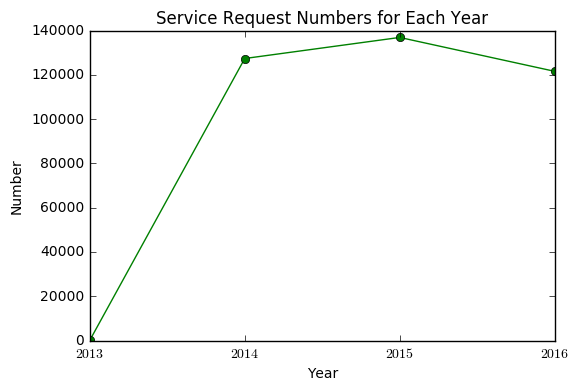

In [63]:
import pandas as pd
CountByYear=_
CountByYear = pd.DataFrame(CountByYear,columns=['createcase_year','count'])

%matplotlib inline
from matplotlib import pyplot as plt

plt.plot(CountByYear['createcase_year'], CountByYear['count'], color='green', marker='o', linestyle='solid')
plt.title("Service Request Numbers for Each Year")
plt.xticks([2013, 2014, 2015, 2016],[r'$2013$', r'$2014$', r'$2015$', r'$2016$'])
plt.ylabel("Number")
plt.xlabel("Year")

*** We can see that there is only a few service requests in 2013. And we wonder why? ***

**The first assumption is that the records for 2013 are not complete, which means the records start from the end of 2013.**

**Therefore, we want to see the min and max month of records in 2013.**


In [64]:
%%sql
SELECT CreateCase_Month
FROM CreateCaseTime
WHERE CreateCase_Year = 2013

1 rows affected.


createcase_month
12


**We can see that the records in 2013 is only for December 2013, so we focus on the records in 2014,2015 and 2016.**

## Questions based on Department Dimension Table

### Question: Which deptartment is efficient in solving the cases?

In [65]:
%%sql
SELECT T3.CreateCase_Year, T2.department_name, AVG(respond_time) AS AvgRespondTime
FROM Fact T1
INNER JOIN Department AS T2
ON T1.dept_key = T2.dept_key
INNER JOIN CreateCaseTime AS T3
ON T1.create_date_key = T3.create_date_key
INNER JOIN Status AS T4
ON T1.Status_key = T4.Status_key
WHERE CreateCase_Year IN (2014,2015,2016) AND SR_Status LIKE '%losed%'
GROUP BY T3.createcase_year, T2.department_name
ORDER BY CreateCase_Year, department_name DESC;

41 rows affected.


createcase_year,department_name,avgrespondtime
2014,Watershed Protection,32.1214046428329
2014,Transportation,18.5583624600296
2014,Public Works,55.2721220844301
2014,Parks & Recreation Department,8.97437503160932
2014,Neighborhood Housing & Community Development,163.508296565006
2014,Health & Human Services,8.18089162974241
2014,Economic Development Department,0.00767732423873351
2014,Austin Water Utility,10.6127214382584
2014,Austin Resource Recovery,2.9950909931572
2014,Austin Energy Department,3.74407903142911


In [ ]:
!pip install plotly

In [68]:
import plotly as py
#py.tools.set_credentials_file(username='zzyy2361669', api_key='U4js9YvyZajjXb1q1g4n')
py.tools.set_credentials_file(username='zy2361669', api_key="545WZGcM8fJlZvnZGCLs")
import plotly.plotly as py
import plotly.tools as plotly_tools
from plotly.graph_objs import *
#py.sign_in("zzyy2361669", "U4js9YvyZajjXb1q1g4n")
py.sign_in("zy2361669", "545WZGcM8fJlZvnZGCLs")
import pandas as pd

In [69]:
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd

result = _
df_Year = pd.DataFrame(result,columns=["Year",'Department',"Time"])

color_List = ["#FF8C69","#FFEC8B","#6495ED"]
data = []
df_s = df_Year[(df_Year["Year"]== 2014)]
dept_List = [n for n in df_s["Department"]]

for i in range(3):
    year = i+2014
    df_sub = df_Year[(df_Year["Year"]== year)]
    y_List = []
    for k in dept_List:
        try:
            y = df_sub[(df_sub["Department"])==k]["Time"]
            y_List.append(y) 
        except:
            y_List.append(0)
 
    trace = go.Scatter(

    x = dept_List,
    y = y_List, 
        
    mode = 'lines+markers',
    name = str(year),
    line = dict(
        color = (color_List[i]),
        width = 2,)    
    )
    data.append(trace )

layout = dict(title = 'Average Respond Time of Each Department From 2014 to 2016',
              xaxis = dict(title = 'Department'),
              yaxis = dict(title = 'Respond Time (day)'),
              )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Time per year')

In [70]:
# you need to run all the above code to show the map, or you can see the screenshot below.
from IPython.display import Image
Image(url = "https://github.com/YingZhang1028/istm-6212/raw/master/project03/Graph/Graph_1_Time.png", width=800, height=800)

** From above graph, we find that the efficiency in most department improves yearly. Neighborhood Housing & Community Developmemt imporved greatly.**

In [69]:
%%sql
SELECT T2.department_name, AVG(respond_time) AS AvgRespondTime
FROM Fact T1
INNER JOIN Department AS T2
ON T1.dept_key = T2.dept_key
INNER JOIN Status AS T4
ON T1.Status_key = T4.Status_key
WHERE SR_Status LIKE '%losed%'
GROUP BY T2.department_name
ORDER BY AvgRespondTime DESC;

15 rows affected.


department_name,avgrespondtime
Public Health,133.20977973938
Neighborhood Housing & Community Development,106.191487983421
Austin Fire Department,96.1804852613638
Animal Services Office,52.490398050558
Public Works,50.7489951814982
Watershed Protection,26.7904894017046
Health & Human Services,16.4576325936308
Transportation,13.9474808454715
Austin Water Utility,7.55925329648145
Parks & Recreation Department,6.47773012886429


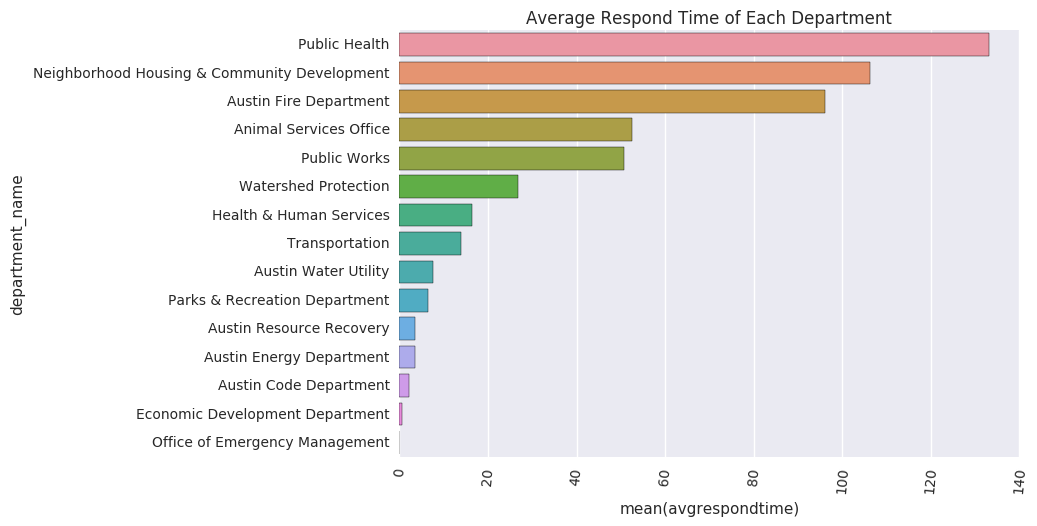

In [70]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
df_2015 = _.DataFrame()
sns.barplot(y='department_name', x='avgrespondtime', data=df_2015)
plt.xticks(rotation=85)
plt.title("Average Respond Time of Each Department")
plt.show()

** From above graph, we find that Public Health Department has less efficiency. Neighborhood Housing & Community Developmemt is the second less efficient. Office of Emergency has the most efficiency.**

### Question: Which deptartment has received the most case?

In [71]:
%%sql
SELECT T3.CreateCase_Year, T2.department_name, COUNT(srid) AS Number_of_Case
FROM Fact T1
INNER JOIN Department AS T2
ON T1.dept_key = T2.dept_key
INNER JOIN CreateCaseTime AS T3
ON T1.create_date_key = T3.create_date_key
WHERE CreateCase_Year IN (2014,2015,2016)
GROUP BY T3.createcase_year, T2.department_name
ORDER BY CreateCase_Year, department_name DESC;

41 rows affected.


createcase_year,department_name,number_of_case
2014,Watershed Protection,2206
2014,Transportation,23341
2014,Public Works,8213
2014,Parks & Recreation Department,6791
2014,Neighborhood Housing & Community Development,19
2014,Health & Human Services,5829
2014,Economic Development Department,6677
2014,Austin Water Utility,4889
2014,Austin Resource Recovery,17272
2014,Austin Energy Department,5198


In [72]:
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd

result = _
df_Year = pd.DataFrame(result,columns=["Year",'Department',"Requests"])

color_List = ["#FF8C69","#FFEC8B","#6495ED"]
data = []
df_s = df_Year[(df_Year["Year"]== 2014)]
dept_List = [n for n in df_s["Department"]]

for i in range(3):
    year = i+2014
    df_sub = df_Year[(df_Year["Year"]== year)]
    y_List = []
    for k in dept_List:
        y = df_sub[(df_sub["Department"])==k]["Requests"]
        y_List.append(y)  
 
    trace = go.Scatter(

    x = dept_List,
    y = y_List, 
        
    mode = 'lines+markers',
    name = str(year),
    line = dict(
        color = (color_List[i]),
        width = 2,)    
    )
    data.append(trace )

layout = dict(title = 'Number of Service Requests of Each Department From 2014 to 2016',
              xaxis = dict(title = 'Department'),
              yaxis = dict(title = 'Number of Service Requests'),
              )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Requests per year')

In [73]:
# you need to run all the above code to show the map, or you can see the screenshot below.
from IPython.display import Image
Image(url = "https://github.com/YingZhang1028/istm-6212/raw/master/project03/Graph/Graph_2_NumberSR.png", width=800, height=800)

**Animal Services Office has the most requests. So we want to find which period is the peak season. We find the top 5 month in which Animal Service Office has the most cases.**

In [74]:
%%sql
SELECT T2.CreateCase_year, T2.CreateCase_month, COUNT(srid) AS Number_of_Case
FROM Fact T1
INNER JOIN CreateCaseTime AS T2
ON T1.create_date_key = T2.create_date_key
INNER JOIN Department AS T3
ON T1.dept_key = T3.dept_key
WHERE Department_Name = 'Animal Services Office' 
GROUP BY T2.CreateCase_year, T2.CreateCase_month
order by Number_of_Case desc
Limit 5;

5 rows affected.


createcase_year,createcase_month,number_of_case
2016,5,3033
2015,5,2832
2016,4,2640
2014,9,2589
2015,6,2577


### Question: Find the top 5 request type for Animal Services Office in May 2016, draw the map

In [75]:
%%sql
SELECT T4.SRType_Des, COUNT(srid) AS Number_of_Case
FROM Fact T1
INNER JOIN CreateCaseTime AS T2
ON T1.create_date_key = T2.create_date_key
INNER JOIN SRType AS T4
ON T1.SRType_key = T4.SRType_key
INNER JOIN Department AS T3
ON T1.dept_key = T3.dept_key
WHERE Department_Name = 'Animal Services Office' AND CreateCase_year = '2016' AND CreateCase_month = '5'
GROUP BY T4.SRType_key
order by Number_of_Case desc
Limit 5;

5 rows affected.


srtype_des,number_of_case
Loose Dog,953
Injured / Sick Animal,600
Animal Control - Assistance Request,575
Found Animal Report - Keep,173
Animal - Proper Care,147


In [76]:
%%sql
SELECT T1.SRID, T2.createcase_date, T4.SRType_Des, T5.Latitude, T5.Longitude
FROM Fact T1
INNER JOIN CreateCaseTime AS T2
ON T1.create_date_key = T2.create_date_key
INNER JOIN SRType AS T4
ON T1.SRType_key = T4.SRType_key
INNER JOIN Department AS T3
ON T1.dept_key = T3.dept_key
INNER JOIN Location T5
ON T1.Location_key = T5.Location_key
WHERE (Department_Name = 'Animal Services Office' AND CreateCase_year = '2016' AND CreateCase_month = '6' AND
       (T4.SRType_Des = 'Loose Dog' OR T4.SRType_Des = 'Injured / Sick Animal'OR
       T4.SRType_Des = 'Animal Control - Assistance Request' OR T4.SRType_Des = 'Animal - Proper Care' 
       OR T4.SRType_Des = 'Found Animal Report - Keep'))
;

1845 rows affected.


srid,createcase_date,srtype_des,latitude,longitude
16-00132993,2016-06-01,Animal Control - Assistance Request,30.26776386,-97.76790653
16-00133148,2016-06-01,Injured / Sick Animal,30.19698633,-97.74417855
16-00132827,2016-06-01,Loose Dog,30.23070682,-97.80238423
16-00134416,2016-06-02,Injured / Sick Animal,30.24916296,-97.77809864
16-00135107,2016-06-03,Animal Control - Assistance Request,30.14953804,-97.85380907
16-00135494,2016-06-03,Animal Control - Assistance Request,30.31901137,-97.72657425
16-00134030,2016-06-02,Loose Dog,30.27469147,-97.75391271
16-00134582,2016-06-02,Animal - Proper Care,30.20592416,-97.83332135
16-00133763,2016-06-01,Found Animal Report - Keep,30.27966074,-97.69004429
16-00136268,2016-06-04,Loose Dog,30.29175691,-97.64469477


In [77]:
import plotly as py
#py.tools.set_credentials_file(username='zzyy2361669', api_key='U4js9YvyZajjXb1q1g4n')
py.tools.set_credentials_file(username='zy2361669', api_key="545WZGcM8fJlZvnZGCLs")
import plotly.plotly as py
import plotly.tools as plotly_tools
from plotly.graph_objs import *
#py.sign_in("zzyy2361669", "U4js9YvyZajjXb1q1g4n")
py.sign_in("zy2361669", "545WZGcM8fJlZvnZGCLs")
import pandas as pd

In [78]:
result = _
df= pd.DataFrame(result,columns=["ID","Date","Type","Lat","Lon"])
df['text'] = df["Date"] + '' + df["Type"]

mapbox_access_token = "pk.eyJ1IjoienkyMzYxNjY5IiwiYSI6ImNpdzhtb3NreTAyZ3Eyem1oNGFoaGNzcjUifQ.0KdVns1zQyjGXUvn2Ab_jw"

Stype_List = ['Loose Dog','Animal Control - Assistance Request','Injured / Sick Animal',\
              'Animal - Proper Care','Found Animal Report - Keep']
Color_List = ["#FF8C69","#EEA2AD","#FFEC8B","#7A67EE","#66CDAA"]

dat = []

for i in range(len(Stype_List)):
    df_sub = df[(df["Type"]==Stype_List[i])]  
    x = df_sub['Lat'].tolist()
    y = df_sub['Lon'].tolist()
    
    d = Scattermapbox(
            lat=x,
            lon=y,
            mode='markers',
            marker=Marker(
                size=6, color=Color_List[i] 
            ),
        text = [n for n in df_sub['text']],
        name = Stype_List[i])
    dat.append(d)
    
data = Data(dat)      

layout = Layout(
    autosize=True,
    width=1000,
    height=600,
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=30.3,
            lon=-97.8
        ),
        pitch=0,
        zoom=10
    ),
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Animal', validate=False)

In [79]:
# you need to run all the above code to show the map, or you can see the screenshot below.
from IPython.display import Image
Image(url = "https://github.com/YingZhang1028/istm-6212/raw/master/project03/Graph/Map_2_Animal.png", width=800, height=800)

**-----End of Department Dimension----**

## Question based on two Time Dimension Table?

### Question: What is the trend of service requests in 2014,2015 and 2016? 

In [80]:
%%sql
SELECT CreateCase_Month,COUNT(*)
FROM Fact
INNER JOIN CreateCaseTime ON Fact.Create_Date_Key = CreateCaseTime.Create_Date_Key
WHERE CreateCase_Year = 2014
GROUP BY CreateCase_Month
ORDER BY CreateCase_Month

12 rows affected.


createcase_month,count
1,8634
2,7867
3,9824
4,11308
5,10774
6,12520
7,12231
8,12266
9,12367
10,11677


In [81]:
import pandas as pd
CountByMonth2014=_
CountByMonth2014 = pd.DataFrame(CountByMonth2014,columns=['createcase_month','count'])

In [82]:
%%sql
SELECT CreateCase_Month,COUNT(*)
FROM Fact
INNER JOIN CreateCaseTime ON Fact.Create_Date_Key = CreateCaseTime.Create_Date_Key
WHERE CreateCase_Year = 2015
GROUP BY CreateCase_Month
ORDER BY CreateCase_Month

12 rows affected.


createcase_month,count
1,8866
2,8162
3,10545
4,11614
5,14195
6,15217
7,13833
8,12488
9,11358
10,12218


In [83]:
import pandas as pd
CountByMonth2015 =_
CountByMonth2015 = pd.DataFrame(CountByMonth2015,columns=['createcase_month','count'])

In [84]:
%%sql
SELECT CreateCase_Month,COUNT(*)
FROM Fact
INNER JOIN CreateCaseTime ON Fact.Create_Date_Key = CreateCaseTime.Create_Date_Key
WHERE CreateCase_Year = 2016
GROUP BY CreateCase_Month
ORDER BY CreateCase_Month

12 rows affected.


createcase_month,count
1,8963
2,8798
3,10419
4,11511
5,12705
6,12812
7,9611
8,11962
9,12611
10,10647


In [85]:
import pandas as pd
CountByMonth2016 =_
CountByMonth2016 = pd.DataFrame(CountByMonth2016,columns=['createcase_month','count'])

In [86]:
Month2014 = CountByMonth2014['count']
Month2015 = CountByMonth2015['count']
Month2016 = CountByMonth2016['count']

In [87]:
MonthAvg=[1,2,3,4,5,6,7,8,9,10,11,12]
for i in range(0,12):
    sum=Month2014[i]+Month2015[i]+Month2016[i]
    #print(sum)
    MonthAvg[i]=sum/3
    #print(MonthAvg[i])

MonthAvgNumber = pd.DataFrame(MonthAvg,columns=['count'])
MonthAvgNumber

,count
0,8821.000000
1,8275.666667
2,10262.666667
3,11477.666667
4,12558.000000
5,13516.333333
6,11891.666667
7,12238.666667
8,12112.000000
9,11514.000000


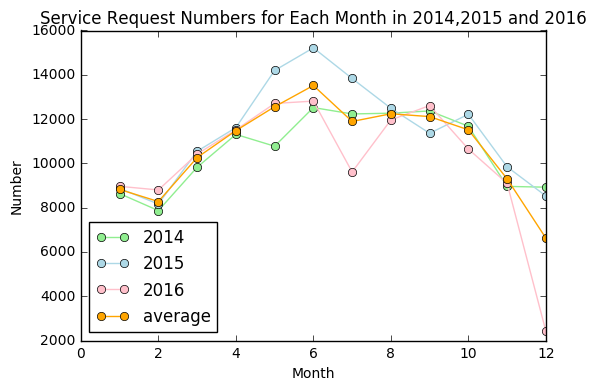

In [88]:
%matplotlib inline
from matplotlib import pyplot as plt

month=[1,2,3,4,5,6,7,8,9,10,11,12]
plt.plot(month, CountByMonth2014['count'], color='lightgreen', marker='o', linestyle='solid',label='2014')
plt.plot(month, CountByMonth2015['count'], color='lightblue', marker='o', linestyle='solid',label='2015')
plt.plot(month, CountByMonth2016['count'], color='pink', marker='o', linestyle='solid',label='2016')
plt.plot(month, MonthAvgNumber['count'], color='orange', marker='o', linestyle='solid',label='average')
plt.legend(loc="best")
plt.title("Service Request Numbers for Each Month in 2014,2015 and 2016")
plt.ylabel("Number")
plt.xlabel("Month")

** From the figure above, we can conclude that the most frequent service requests are in June. So in our next analysis, we will focus on the June.**

## Question: Based on the data in June 2016, what is the distribution of service request per hour per day?

In [15]:
%%sql
SELECT CreateCase_day,CreateCase_hour,COUNT(*)
FROM Fact
INNER JOIN CreateCaseTime ON Fact.Create_Date_Key = CreateCaseTime.Create_Date_Key
WHERE CreateCase_year = 2016 AND CreateCase_month = 6
GROUP BY CreateCase_day,CreateCase_hour
ORDER BY Createcase_day,CreateCase_hour;

657 rows affected.


createcase_day,createcase_hour,count
1,0,4
1,2,2
1,3,1
1,5,5
1,6,7
1,7,32
1,8,41
1,9,32
1,10,49
1,11,34


In [16]:
import pandas as pd
CountByHour =_
CountByHour = pd.DataFrame(CountByHour,columns=['CreateCase_day','CreateCase_hour','count'])

In [17]:
result = CountByHour[CountByHour['CreateCase_day']==1]
result2 = result[result['CreateCase_hour']==2]

In [18]:
%%sql
SELECT CreateCase_day, CreateCase_hour, SRID
FROM Fact
INNER JOIN CreateCaseTime ON Fact.Create_Date_Key = CreateCaseTime.Create_Date_Key
WHERE CreateCase_year = 2016 AND CreateCase_month = 6
ORDER BY CreateCase_day,CreateCase_hour;

12812 rows affected.


createcase_day,createcase_hour,srid
1,0,16-00132656
1,0,16-00132668
1,0,16-00132671
1,0,16-00132659
1,2,16-00132675
1,2,16-00132676
1,3,16-00132678
1,5,16-00132682
1,5,16-00132686
1,5,16-00132683


In [19]:
import pandas as pd
result =_
result = pd.DataFrame(result,columns=['Createcase_day','CreateCase_hour','SRID'])

In [20]:
hour_day_counts = result.groupby(["Createcase_day"]).count().SRID.values
hour_day_counts = pd.DataFrame(hour_day_counts,columns=['NumberofDay'])

In [23]:
import numpy as np
ResultCount = np.zeros((30, 24))
index = 0
for i in range(0,30):
    for j in range(0,24):
        #print(i+1,j)
        result = CountByHour[CountByHour['CreateCase_day']==i+1]
        result2 = result[result['CreateCase_hour']==j]
        #print(result2)
        if result2.empty:
            ResultCount[i,j] = 0
        else:
            num = result2['count'][index]
            nsum = hour_day_counts["NumberofDay"][i]
            ResultCount[i,j] = num/nsum
            index = index+1
        #print(ResultCount[i,j])

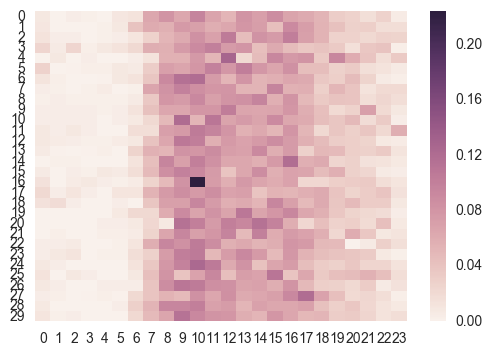

In [26]:
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

df = pd.DataFrame(data=ResultCount)

mask = df.isnull()
sns.heatmap(df, mask=mask)

** From the heatmap, we can see that most of the service requests are concentrated in the working hours.**

** From this finding, we are wondering: **

### Question: Will weekend influence the number of service requests? 

In [29]:
%%sql
SELECT COUNT(*),Create_day_of_week_Str
FROM Fact
INNER JOIN CreateCaseTime ON CreateCaseTime.Create_Date_Key = Fact.Create_Date_Key
WHERE CreateCaseTime.CreateCase_year = 2016 AND CreateCaseTime.CreateCase_month = 6
GROUP BY Create_day_of_week_Str
ORDER BY COUNT(*) DESC;

7 rows affected.


count,create_day_of_week_str
2474,Wednesday
2332,Thursday
2061,Friday
2013,Tuesday
1915,Monday
1104,Saturday
913,Sunday


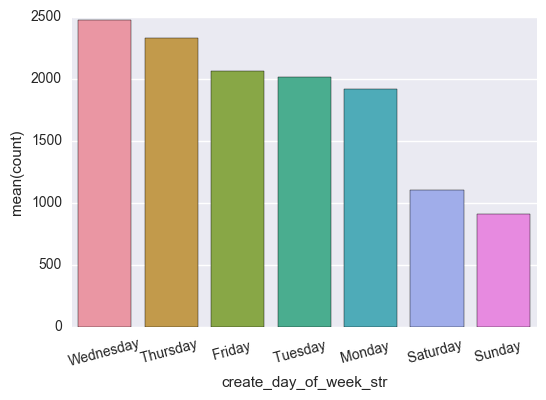

In [30]:
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rc

result = _.DataFrame()
rc('figure', figsize=(6, 4))
splt = sns.barplot(x='create_day_of_week_str', y='count', data=result)
labels = [l for l in splt.get_xmajorticklabels()]
splt.set_xticklabels(labels, rotation=15)

** From the figure above, we can find people tend to make service requests in weekdays.**
** So, another two questions raised: **


### Question: Is there a seasonal pattern for the number of cases?



In [31]:
%%sql
SELECT T2.createcase_month, COUNT(srid) AS Number_of_Case
FROM Fact T1
INNER JOIN CreateCaseTime AS T2
ON T1.create_date_key = T2.create_date_key
WHERE CreateCase_Year = '2015'
GROUP BY T2.createcase_month
ORDER BY createcase_month;

12 rows affected.


createcase_month,number_of_case
1,8866
2,8162
3,10545
4,11614
5,14195
6,15217
7,13833
8,12488
9,11358
10,12218


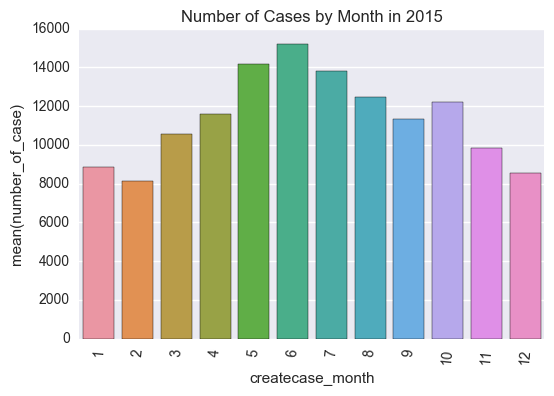

In [32]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
df_2015 = _.DataFrame()
sns.barplot(x='createcase_month', y='number_of_case', data=df_2015)
plt.xticks(rotation=85)
plt.title("Number of Cases by Month in 2015")
plt.show()

**We found that summer (from May to August) has more cases than other season. People raised less cases in winter.**


### Question: Will the holiday affect the respond time?


In [33]:
%%sql
SELECT T2.createcase_month, AVG(respond_time) AS AvgRespondTime
FROM Fact T1
INNER JOIN CreateCaseTime AS T2
ON T1.create_date_key = T2.create_date_key
INNER JOIN Status AS T4
ON T1.Status_key = T4.Status_key
WHERE CreateCase_Year = '2015' AND SR_Status LIKE '%losed%'
GROUP BY T2.createcase_month
ORDER BY createcase_month;


12 rows affected.


createcase_month,avgrespondtime
1,35.3704890452953
2,28.8258674395992
3,32.5154126832769
4,30.8729371154328
5,32.2312914160624
6,26.9502993601791
7,24.4891079845998
8,20.3482141933769
9,19.0960350033793
10,16.7140385866891


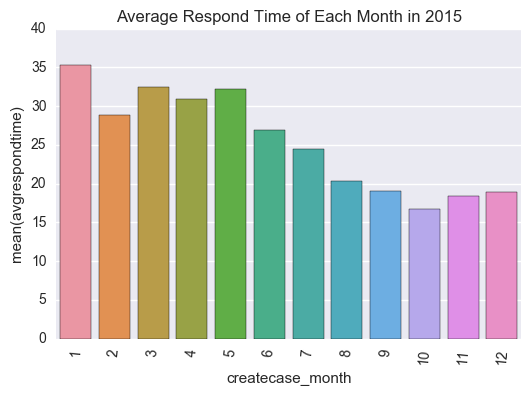

In [34]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
df_2015 = _.DataFrame()
sns.barplot(x='createcase_month', y='avgrespondtime', data=df_2015)
plt.xticks(rotation=85)
plt.title("Average Respond Time of Each Month in 2015")
plt.show()

** The graph shows that it took longer to solve cases in the first half year. The second half year was more efficient. **

**---End of two Time Dimension.----**

## Question about Method Dimension Table
### What is the number of service requests for each method_received?

In [35]:
%%sql
SELECT T2.method_received, COUNT(srid) AS Number_of_Case
FROM Fact T1
FULL JOIN Method AS T2
ON T1.method_key = T2.method_key
INNER JOIN CreateCaseTime AS T3
ON T1.create_date_key = T3.create_date_key
WHERE CreateCase_Year != '2013'
GROUP BY T2.method_received
ORDER BY Number_of_Case DESC;

19 rows affected.


method_received,number_of_case
Phone,332437
Spot311 Interface,22742
Web,20722
Mass Entry,6512
Field Request,2084
E-Mail,241
Open311,151
CSR - Follow On SR,56
Field Reque,35
Other,20


## Question about Status Dimension Table
### What is the number of service requests for each kind of status?

In [36]:
%%sql
SELECT COUNT(*),SR_Status as Status
FROM Fact
INNER JOIN Status ON Fact.Status_key = Status.Status_key
INNER JOIN CreateCaseTime ON CreateCaseTime.Create_Date_Key = Fact.Create_Date_Key
WHERE CreateCase_Year != 2013
GROUP BY SR_Status
ORDER BY count DESC;

15 rows affected.


count,status
347194,Closed
12645,Duplicate (closed)
12611,Open
6975,Resolved
3360,New
872,Work In Progress
529,Duplicate (open)
366,Transferred
238,Closed -Incomplete Information
205,TO BE DELETED


From the figure above, we can learn that only a few service requests would happen at Weekends.

### Bonus - Augment (10 points)

Sometimes the most value can be gained from one dataset when it is studied alongside data drawn from other
sources. Identify at least one additional data source that can complement your analysis. Pull this additional
data into your chosen environment and explore at least one more theme you are able to further analyze that
depends upon a combination of data from both sources.


In [17]:
!wget "https://data.austintexas.gov/api/views/8c6z-qnmj/rows.csv?accessType=DOWNLOAD"

--2016-12-06 20:03:14--  https://data.austintexas.gov/api/views/8c6z-qnmj/rows.csv?accessType=DOWNLOAD
Resolving data.austintexas.gov (data.austintexas.gov)... 52.206.140.205
Connecting to data.austintexas.gov (data.austintexas.gov)|52.206.140.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD’

rows.csv?accessType     [ <=>                  ] 354.92M  2.63MB/s   in 2m 27s 

Last-modified header invalid -- time-stamp ignored.
2016-12-06 20:05:42 (2.41 MB/s) - ‘rows.csv?accessType=DOWNLOAD’ saved [372162617]



** Rename the file.**

In [18]:
!mv rows.csv?accessType=DOWNLOAD Spending.csv

In [19]:
!csvcut -n Spending.csv

  1: FY_DC
  2: PER_CD
  3: DEPT_CD
  4: DEPT_NM
  5: FUND_CD
  6: FUND_NM
  7: DIV_CD
  8: DIV_NM
  9: GP_CD
 10: GP_NM
 11: OCAT_CD
 12: OCAT_NM
 13: OBJ_CD
 14: OBJ_NM
 15: LGL_NM
 16: VEND_CUST_CD
 17: VEND_CUST_IND
 18: RFED_DOC_CD
 19: RFED_DOC_DEPT_CD
 20: RFED_DOC_ID
 21: COMM_CD
 22: COMM_DSCR
 23: CHK_EFT_ISS_DT
 24: CVL_CHK_STA_DV
 25: RFED_VEND_LN_NO
 26: RFED_COMM_LN_NO
 27: RFED_ACTG_LN_NO
 28: RF_DOC_CD
 29: RF_DOC_DEPT_CD
 30: RF_DOC_ID
 31: ACTG_LN_DSCR
 32: AMOUNT
 33: CAL_YEAR
 34: CAL_MONTH


!head -5 Spending.csv|csvcut -c1,2,3,4| csvlook
!head -5 Spending.csv|csvcut -c5,6,7,8| csvlook
!head -5 Spending.csv|csvcut -c9,10,11,12| csvlook
!head -5 Spending.csv|csvcut -c13,14,15,16| csvlook
!head -5 Spending.csv|csvcut -c17,18,19| csvlook
!head -5 Spending.csv|csvcut -c20,21,22| csvlook
!head -5 Spending.csv|csvcut -c23,24,25| csvlook
!head -5 Spending.csv|csvcut -c26,27,28| csvlook
!head -5 Spending.csv|csvcut -c29,30,31| csvlook
!head -5 Spending.csv|csvcut -c32,33,34| csvlook

In [183]:
!csvstat Spending.csv

Killed


In [20]:
%%sql
DROP TABLE IF EXISTS  Spending;
CREATE TABLE  Spending
(
    FY_DC VARCHAR(64),
    PER_CD VARCHAR(64),
    DEPT_CD VARCHAR(64),
    DEPT_NM VARCHAR(64),
    FUND_CD VARCHAR(64),
    FUND_NM VARCHAR(64),
    DIV_CD VARCHAR(64),
    DIV_NM VARCHAR(64),
    GP_CD VARCHAR(64),
    GP_NM VARCHAR(64),
    OCAT_CD VARCHAR(64),
    OCAT_NM VARCHAR(64),
    OBJ_CD VARCHAR(64),
    OBJ_NM VARCHAR(64),
    LGL_NM VARCHAR(64),
    VEND_CUST_CD VARCHAR(64),
    VEND_CUST_IND CHAR(64),
    RFED_DOC_CD VARCHAR(64),
    RFED_DOC_DEPT_CD VARCHAR(64),
    RFED_DOC_ID VARCHAR(64),
    COMM_CD VARCHAR(64),
    COMM_DSCR VARCHAR(64),
    CHK_EFT_ISS_DT VARCHAR(64),
    CVL_CHK_STA_DV VARCHAR(64),
    RFED_VEND_LN_NO VARCHAR(64),
    RFED_COMM_LN_NO VARCHAR(64),
    RFED_ACTG_LN_NO VARCHAR(64),
    RF_DOC_CD VARCHAR(64),
    RF_DOC_DEPT_CD VARCHAR(64),
    RF_DOC_ID VARCHAR(64),
    ACTG_LN_DSCR VARCHAR(64),
    AMOUNT float(2),
    CAL_YEAR INTEGER,
    CAL_MONTH INTEGER
)

Done.
Done.


[]

In [21]:
%%sql
COPY Spending FROM '/home/jovyan/work/Spending.csv'
CSV
HEADER
QUOTE '"'
DELIMITER ',';

1106653 rows affected.


[]

In [22]:
%%sql
ALTER TABLE Spending
ADD COLUMN ID SERIAL;

Done.


[]

In [23]:
%%sql
select *
from Spending
limit 5

5 rows affected.


fy_dc,per_cd,dept_cd,dept_nm,fund_cd,fund_nm,div_cd,div_nm,gp_cd,gp_nm,ocat_cd,ocat_nm,obj_cd,obj_nm,lgl_nm,vend_cust_cd,vend_cust_ind,rfed_doc_cd,rfed_doc_dept_cd,rfed_doc_id,comm_cd,comm_dscr,chk_eft_iss_dt,cvl_chk_sta_dv,rfed_vend_ln_no,rfed_comm_ln_no,rfed_actg_ln_no,rf_doc_cd,rf_doc_dept_cd,rf_doc_id,actg_ln_dscr,amount,cal_year,cal_month,id
2015,5,11,Austin Energy,3250,E-Distribution Capital,3101,Fy2001 Distribution Parent,DIST,Distribution,152,Contractual Services,5560,Services-construction contr,PIKE ENTERPRISES INC,V00000914477,V,PRC,1100,MAX34481,91438,Electrical,02/19/0015,Paid,1,5,1,DOM,1100,MAX46311,Electrical,43.24,2015,2,1
2015,5,57,Law,5150,Support Services Fund,5OPA,Opinions and Advice,5GCS,Municipal Operations,152,Contractual Services,6633,Subscriptions,Texas Legislative Service,MIS0000572,V,GAX,5700,15011606502,None,None,02/05/0015,Paid,1,0,1,None,None,None,Subscriptions,3925.0,2015,2,2
2014,11,93,Emergency Medical Services,1000,General Fund,5BSV,Billing Services,5BLS,Billing Services,152,Contractual Services,5860,Services-other,GMSL CONSULTING LLC,VC0000102791,V,PRM,9300,14082134394,96671,"Paper Cutting, Drilling, Folding, Punching, Shredd",08/24/0014,Paid,1,2,1,DO,9300,14081818973,"Paper Cutting, Drilling, Folding, Punching, Shredd",306.0,2014,8,3
2014,8,22,Austin Water Utility,5220,Water Inventory Fund,ZZZZ,Miscellaneous,ZZZZ,Miscellaneous,154,Commodities/Other,7730,Inventory purchases,W W GRAINGER INC,WWG2097000,V,PRM,2200,14051923636,20027100001,"GLOVES WORK RBR NEOPRENE COATED 14""LONG GAUNTLET",05/22/0014,Paid,1,22,1,DO,2200,14042312106,"GLOVES WORK RBR NEOPRENE COATED 14""LONG GAUNTLET",93.6,2014,5,4
2015,11,63,Watershed,5100,Drainage Utility Fund,63WM,Infrastructure & Waterway Maintenance,42DM,Drainage Pipeline Management,152,Contractual Services,6407,Telephone-cellular phones,CELLCO PARTNERSHIP,VER8306150,V,PRM,6300,15082636487,91577,"Telephone Services, Long Distance and Local (Inclu",08/29/0015,Paid,1,1,13,DO,6300,14102101788,"Telephone Services, Long Distance and Local (Inclu",42.92,2015,8,5


In [24]:
%%sql
DROP TABLE IF EXISTS SpendingTime;
CREATE TABLE SpendingTime
(
    Time_key serial,
    SpendingMonth INTEGER,
    SpendingYear INTEGER,
    PRIMARY KEY (Time_key)
)


Done.
Done.


[]

In [25]:
%%sql
INSERT INTO SpendingTime (SpendingMonth,SpendingYear)
SELECT DISTINCT cal_month, cal_year
FROM Spending;


96 rows affected.


[]

In [26]:
%%sql
select *
from SpendingTime
limit 10

10 rows affected.


time_key,spendingmonth,spendingyear
1,6,2012
2,7,2016
3,1,2011
4,7,2009
5,9,2011
6,10,2014
7,10,2015
8,8,2009
9,8,2016
10,5,2011


In [27]:
%%sql
DROP TABLE IF EXISTS SpendingFact;
CREATE TABLE SpendingFact
(
    SPID integer,
    Time_key integer,
    Dept_key integer,
    Amount float(2)
)

Done.
Done.


[]

In [28]:
%%sql
select *
from SpendingFact
limit 5

0 rows affected.


spid,time_key,dept_key,amount


In [29]:
%%sql
INSERT INTO SpendingFact (SPID,Amount)
SELECT ID, amount
FROM Spending;

1106653 rows affected.


[]

In [30]:
%%sql
select *
from SpendingFact
limit 5

5 rows affected.


spid,time_key,dept_key,amount
1,None,None,43.24
2,None,None,3925.0
3,None,None,306.0
4,None,None,93.6
5,None,None,42.92


In [31]:
%%sql
UPDATE 
  SpendingFact T1
SET
  Time_key = T2.Time_key
FROM (SpendingTime T2
INNER JOIN Spending T3 ON T2.spendingmonth = T3.cal_month AND T2.spendingyear = T3.cal_year) 
WHERE T1.SPID = T3.ID
;


1106653 rows affected.


[]

In [32]:
%%sql
select *
from SpendingFact
limit 5

5 rows affected.


spid,time_key,dept_key,amount
1,27,None,43.24
2,27,None,3925.0
3,14,None,306.0
4,71,None,93.6
5,16,None,42.92


In [33]:
%%sql
UPDATE 
  SpendingFact T1
SET
  Dept_key = T2.Dept_key
FROM (Department T2
INNER JOIN Spending T3 ON T2.department_name = T3.dept_nm) 
WHERE T1.SPID = T3.ID
;

268589 rows affected.


[]

In [34]:
%%sql
select *
from SpendingFact
where dept_key is null
limit 5;

5 rows affected.


spid,time_key,dept_key,amount
1,27,None,43.24
2,27,None,3925.0
3,14,None,306.0
5,16,None,42.92
7,91,None,3731.33


In [35]:
%%sql
DELETE FROM SpendingFact
WHERE dept_key is null;

838064 rows affected.


[]

** Add forgeign keys. **

In [36]:
%%sql
ALTER TABLE SpendingFact
ADD CONSTRAINT fk_time FOREIGN KEY (time_key) REFERENCES SpendingTime (time_key),
ADD CONSTRAINT fk_dept FOREIGN KEY (dept_key) REFERENCES Department (dept_key)

Done.


[]

In [37]:
%%sql
SELECT CONSTRAINT_NAME, TABLE_NAME, COLUMN_NAME
FROM INFORMATION_SCHEMA.KEY_COLUMN_USAGE
WHERE TABLE_CATALOG = 'ServiceRequest'

17 rows affected.


constraint_name,table_name,column_name
srtype_pkey,srtype,srtype_key
department_pkey,department,dept_key
method_pkey,method,method_key
status_pkey,status,status_key
location_pkey,location,location_key
createcasetime_pkey,createcasetime,create_date_key
closecasetime_pkey,closecasetime,close_date_key
fk_srtype,fact,srtype_key
fk_dept,fact,dept_key
fk_method,fact,method_key


In [38]:
%%sql
select *
from SpendingFact
limit 5;

5 rows affected.


spid,time_key,dept_key,amount
4,71,5,93.6
6,91,5,1700.0
10,91,5,3374.41
11,14,5,169.89
12,6,5,100.0


In [8]:
from IPython.display import Image
Image(url = "https://github.com/YingZhang1028/istm-6212/raw/master/project03/Graph/Bonus_Schema.png",width=3000, height=2000)

### How much does each dept spend each year?

In [63]:
%%sql
SELECT T2.SpendingYear, T3.department_name, SUM(Amount) AS TotalAmount
FROM SpendingFact T1
INNER JOIN SpendingTime AS T2
ON T1.time_key = T2.time_key
INNER JOIN Department AS T3
ON T1.dept_key = T3.dept_key
WHERE SpendingYear in (2014,2015,2016)
GROUP BY T2.SpendingYear, T3.department_name
ORDER BY TotalAmount Desc;

12 rows affected.


spendingyear,department_name,totalamount
2014,Austin Water Utility,203709000.0
2015,Austin Water Utility,137630000.0
2016,Austin Water Utility,95572000.0
2016,Health & Human Services,15348500.0
2014,Health & Human Services,14916800.0
2015,Health & Human Services,14545800.0
2016,Transportation,6263100.0
2014,Transportation,5791760.0
2015,Transportation,4988070.0
2014,Public Works,1482450.0


In [64]:
result = _
df_Spending = pd.DataFrame(result,columns=["Year",'Department',"Spending"])

color_List = ["#FF8C69","#FFEC8B","#6495ED","#778899"]
data = []
dept_List = ["Transportation","Public Works","Health & Human Services","Austin Water Utility"]
year_List = [i+2014 for i in range(3)]

for i in range(4):  
    df_sub = df_Spending[(df_Spending["Department"] == dept_List[i])]
    y_List = []
    for k in year_List:
        y = df_sub[(df_sub["Year"])==k]["Spending"]
        y_List.append(y)  
 
    trace = go.Scatter(

    x = year_List,
    y = y_List, 
        
    mode = 'lines+markers',
    name = dept_List[i],
    line = dict(
        color = (color_List[i]),
        width = 2,)    
    )
    data.append(trace )

layout = dict(title = 'Spending of Each Department From 2014 to 2016',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'Department'),
              )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Requests per year')

In [9]:
# you need to run all the above code to show the map, or you can see the screenshot below.
from IPython.display import Image
Image(url = "https://github.com/YingZhang1028/istm-6212/raw/master/project03/Graph/Bonus_1.png", width=800, height=800)

In [11]:
from IPython.display import Image
Image(url = "https://github.com/YingZhang1028/istm-6212/raw/master/project03/Graph/Time.png",width=3000, height=2000)

In [10]:
from IPython.display import Image
Image(url = "https://github.com/YingZhang1028/istm-6212/raw/master/project03/Graph/Number.png",width=3000, height=2000)

** We saw a large decrease in spending of Water Utility Department, while the number of service requests and average respond time both decrease yearly. **

In [65]:
%%sql
SELECT T2.SpendingYear, T3.department_name, SUM(Amount) AS TotalAmount
FROM SpendingFact T1
INNER JOIN SpendingTime AS T2
ON T1.time_key = T2.time_key
INNER JOIN Department AS T3
ON T1.dept_key = T3.dept_key
WHERE department_name Not Like '%Water%' AND SpendingYear in (2014,2015,2016)
GROUP BY T2.SpendingYear, T3.department_name
ORDER BY TotalAmount Desc;

9 rows affected.


spendingyear,department_name,totalamount
2016,Health & Human Services,15348500.0
2014,Health & Human Services,14916800.0
2015,Health & Human Services,14545800.0
2016,Transportation,6263100.0
2014,Transportation,5791760.0
2015,Transportation,4988070.0
2014,Public Works,1482450.0
2015,Public Works,1385810.0
2016,Public Works,1010310.0


In [66]:
result = _
df_Spending = pd.DataFrame(result,columns=["Year",'Department',"Spending"])

color_List = ["#FF8C69","#FFEC8B","#6495ED"]
data = []
dept_List = ["Transportation","Public Works","Health & Human Services"]
year_List = [i+2014 for i in range(3)]

for i in range(3):  
    df_sub = df_Spending[(df_Spending["Department"] == dept_List[i])]
    y_List = []
    for k in year_List:
        y = df_sub[(df_sub["Year"])==k]["Spending"]
        y_List.append(y)  
 
    trace = go.Scatter(

    x = year_List,
    y = y_List, 
        
    mode = 'lines+markers',
    name = dept_List[i],
    line = dict(
        color = (color_List[i]),
        width = 2,)    
    )
    data.append(trace )

layout = dict(title = 'Spending of Each Department From 2014 to 2016',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'Department'),
              )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Requests per year')

In [12]:
# you need to run all the above code to show the map, or you can see the screenshot below.
from IPython.display import Image
Image(url = "https://github.com/YingZhang1028/istm-6212/raw/master/project03/Graph/Bonus_2.png", width=800, height=800)

In [89]:
from IPython.display import Image
Image(url = "https://github.com/YingZhang1028/istm-6212/raw/master/project03/Graph/Spending.png", width=800, height=800)

**we can see that there is no obvious relationship between response time, number of service requests and spending.**

# Thank you 